# Setup and Installation


In [1]:
%load_ext autoreload
%autoreload 2

import os
import subprocess
import sys
import pkg_resources
import logging

def install_missing_requirements(requirements_path):
    if not os.path.exists(requirements_path):
        print(f"Requirements file '{requirements_path}' not found.")
        return

    with open(requirements_path) as f:
        required = [line.strip() for line in f if line.strip() and not line.startswith("#")]

    installed = {pkg.key for pkg in pkg_resources.working_set}
    
    missing = []
    for req in required:
        pkg_name = req.split("==")[0].lower()  # naive parse
        if pkg_name not in installed:
            missing.append(req)

    if not missing:
        print("All required packages are already installed.")
    else:
        print(f"Installing missing packages: {missing}")
        subprocess.check_call([sys.executable, "-m", "pip", "install", *missing])

def update_repository():
    print("Updating the git repository...")
    try:
        result = subprocess.run(["git", "pull"], capture_output=True, text=True, check=True)
        print(result.stdout)
    except subprocess.CalledProcessError as e:
        print("Git pull failed:")
        print(e.stderr)

# install missing requirements
install_missing_requirements("/home/jovyan/requirements_reddit.txt")

# set cwd to the project root
cwd = os.getcwd()
wd = '/home/jovyan/reddit-mining/'
if cwd != wd:
    os.chdir(wd)

# update the git repository
update_repository()

# set PYTHONPATH to the src directory
sys.path.append('src')

# set up logging
from logger import setup_logger
#logger = setup_logger(level=logging.INFO)
logger = setup_logger(level=logging.DEBUG)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


# imports
from reddit_processing import *
from logger import *
from plotting import *
from nyt_processing import *
from sentiment_analysis import *
from enrichment import *
from to_csv import *
from log_processing import *
from data_processing import *
from mlp_model import *
from trace_generator import *
from article_generator import *
from old_transformer_model import *
import os, sys
import subprocess
import pickle
import json
import optuna
import numpy as np
import pandas as pd
import torch
import pm4py
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, pipeline


Installing missing packages: ['transformers', 'torch', 'pm4py', 'nltk', 'gensim', 'sentence_transformers', 'accelerate', 'umap-learn', 'sentencepiece', 'xgboost', 'optuna', 'yfinance']
Looking in indexes: https://nexus.iisys.de/repository/ki-awz-pypi-group/simple, https://pypi.org/simple
  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/cf/18/eb7578f84ef5a080d4e5ca9bc4f7c68e7aa9c1e464f1b3d3001e4c642fce/transformers-4.54.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.9 MB/s eta 0:00:00
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/0a/7c/0a5b3aee977596459ec45be2220370fde8e017f651fecc40522fd478cb1e/torch-2.7.1-cp310-cp310-manylinux_2_28_x86_64.whl.metadata
  Using cached torch-2.7.1-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (29 kB)
  Obtaining dependency information for pm4py from https://files.pythonhosted.org/packages/0b/b6/365860adaa578853ad648461d21

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tfp-nightly 0.22.0.dev20230905 requires typing-extensions<4.6.0, but you have typing-extensions 4.14.1 which is incompatible.


Updating the git repository...
Already up to date.



2025-08-04 07:49:52.631395: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9511] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-04 07:49:52.631474: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-04 07:49:52.631489: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


ModuleNotFoundError: No module named 'old_transformer_model'

# Evaluate Allocation

Updating the git repository...
Already up to date.



parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

[2025-07-28 09:09:35] [INFO]: Building event_df from Event Log...
[2025-07-28 09:09:40] [DEBUG]: Average total running time (completed traces): 8.62 days
[2025-07-28 09:09:40] [DEBUG]: Selected columns: ['text_combined_text']


status
Unsuccessful    10844
Successful       2243
Name: count, dtype: int64
feature_columns: ['text_combined_text', 'cat_section_name_Business Day']
Evaluating for window: 1, target: outcome_class, learning_rate: 0.0001, y_mode: percentile, percentile: 50


[2025-07-28 09:09:40] [DEBUG]: X constructed with shape (6280, 1024) from ['text_combined_text'].
[2025-07-28 09:09:40] [DEBUG]: [[ 0.02079481 -0.03720236  0.03875393 ... -0.03325082  0.02235201
   0.03111772]
 [ 0.01218458 -0.02097885  0.0443091  ... -0.03064308  0.0181568
   0.01083175]
 [ 0.0165077  -0.03293492  0.01180881 ... -0.03134423  0.03143863
  -0.00758428]
 ...
 [-0.01950711 -0.03885086  0.01380382 ... -0.02703111  0.03700963
  -0.00223089]
 [-0.00975181 -0.04455943  0.01861176 ... -0.01959409  0.01362904
  -0.00048971]
 [-0.00125892 -0.02168567  0.03897707 ... -0.02995482  0.02549766
   0.01705484]]
[2025-07-28 09:09:40] [INFO]: Encoding y with target='outcome_class'...
Encoding y...: 100%|██████████| 6280/6280 [00:02<00:00, 2340.71it/s]
[2025-07-28 09:09:43] [DEBUG]: Outcome class separation: mean=0.3155, std=0.0536
[2025-07-28 09:09:43] [DEBUG]: Using percentile for outcome class separation: 50%
[2025-07-28 09:09:43] [DEBUG]: Outcome class thresholds: <0.2959 or >0.3400 

Epoch 1/250
138/138 [==============================] - 6s 32ms/step - loss: 0.6443 - accuracy: 0.6713 - val_loss: 0.7286 - val_accuracy: 0.5255
Epoch 2/250
138/138 [==============================] - 4s 29ms/step - loss: 0.6338 - accuracy: 0.6717 - val_loss: 0.7361 - val_accuracy: 0.5255
Epoch 3/250
138/138 [==============================] - 4s 30ms/step - loss: 0.6343 - accuracy: 0.6717 - val_loss: 0.7966 - val_accuracy: 0.5255
Epoch 4/250
138/138 [==============================] - 4s 30ms/step - loss: 0.6341 - accuracy: 0.6717 - val_loss: 0.8070 - val_accuracy: 0.5255
Epoch 5/250
138/138 [==============================] - 4s 30ms/step - loss: 0.6325 - accuracy: 0.6717 - val_loss: 0.7226 - val_accuracy: 0.5255
Epoch 6/250
138/138 [==============================] - 4s 29ms/step - loss: 0.6303 - accuracy: 0.6717 - val_loss: 0.7289 - val_accuracy: 0.5255
Epoch 7/250
138/138 [==============================] - 4s 30ms/step - loss: 0.6251 - accuracy: 0.6717 - val_loss: 0.7325 - val_accuracy:

[2025-07-28 09:10:59] [DEBUG]: X_test shape: (1256, 1024)
[2025-07-28 09:10:59] [DEBUG]: y_test shape: (1256,)


40/40 [==============================] - 0s 4ms/step
Accuracy: 0.4650
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.91      0.60       552
           1       0.63      0.11      0.19       704

    accuracy                           0.46      1256
   macro avg       0.54      0.51      0.40      1256
weighted avg       0.55      0.46      0.37      1256



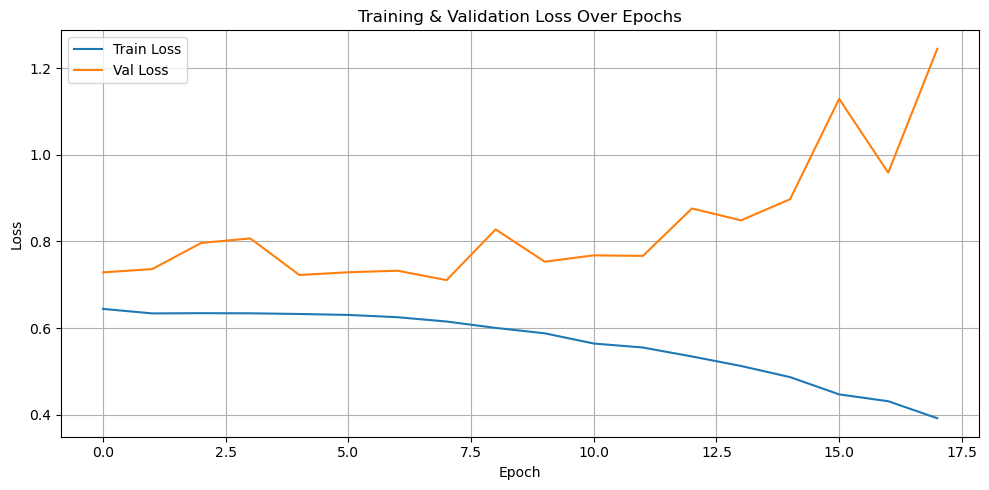

40/40 [==============================] - 0s 4ms/step


[2025-07-28 09:11:00] [INFO]: Plotting precision-recall AUC for cnn_outcome_class_bpi_2012_w1__gtr-t5-xl_text_combined_text_[2048, 1024, 512, 256, 128, 64, 32, 16]_[64, 128]_[7, 5]...


Best Threshold: 0.4962 — Precision: 0.4857, Recall: 0.0570


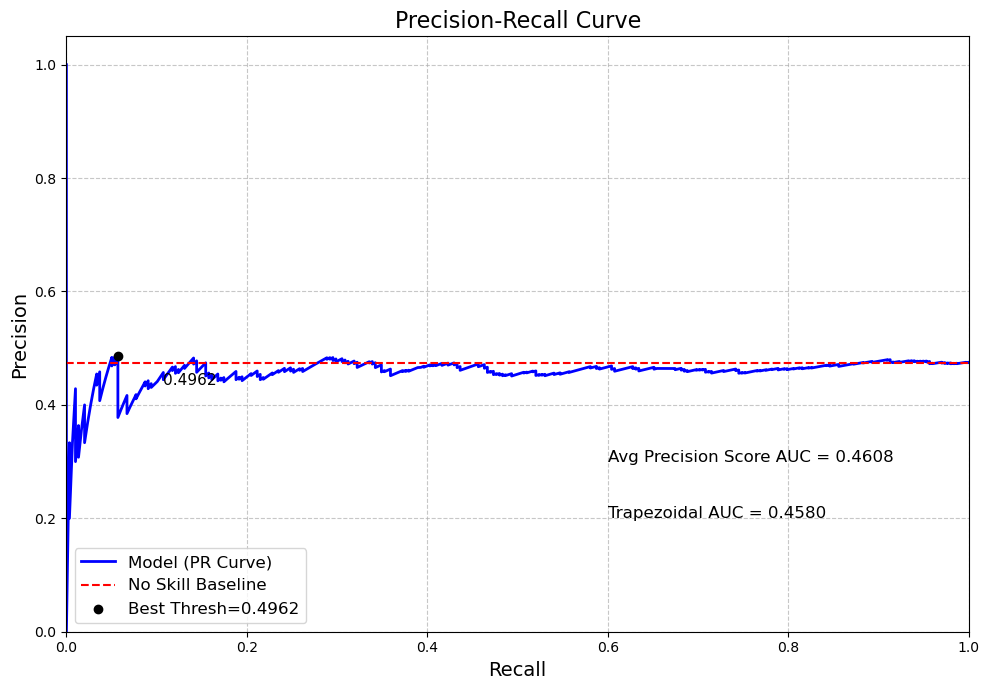

Best Threshold: 0.4963 — Precision: 0.7273, Recall: 0.0114
Compare Threshold: 0.4962 — Precision: 0.5965, Recall: 0.0483


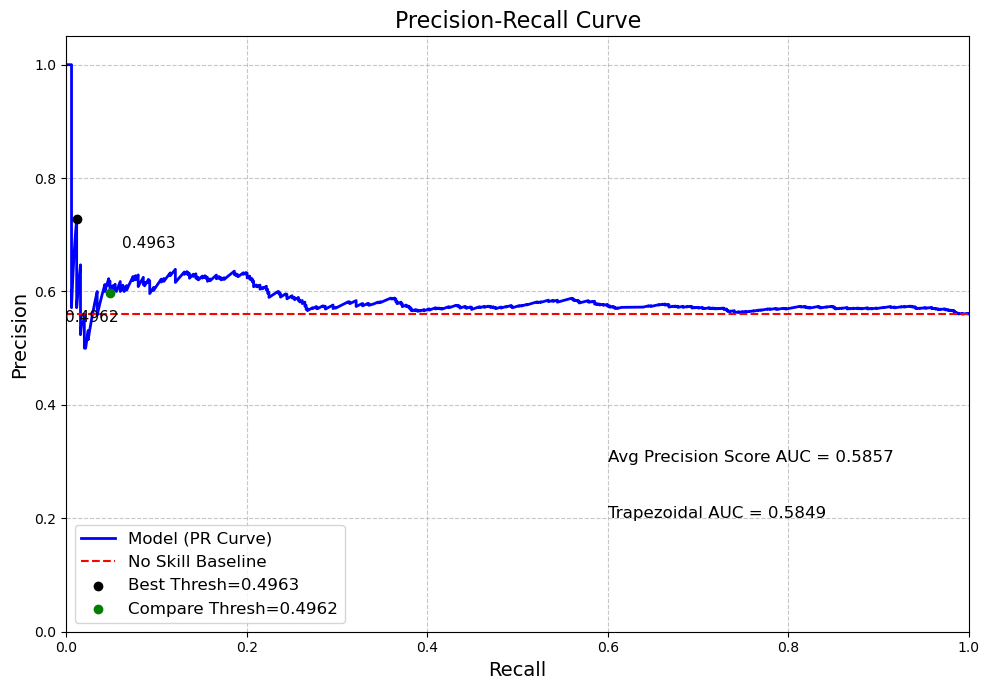

197/197 [==============================] - 1s 4ms/step


[2025-07-28 09:11:05] [INFO]: Saved labeled text data with y to data/labeled/bpi_2012/labeled_cnn_outcome_class_bpi_2012_w1__gtr-t5-xl_text_combined_text_[2048, 1024, 512, 256, 128, 64, 32, 16]_[64, 128]_[7, 5].csv
[2025-07-28 09:11:05] [INFO]: Encoded and saved y for window size 1.
[2025-07-28 09:11:05] [DEBUG]: Selected columns: ['text_combined_text']


Evaluating for window: 2, target: outcome_class, learning_rate: 0.0001, y_mode: percentile, percentile: 50


[2025-07-28 09:11:06] [DEBUG]: X constructed with shape (6280, 1024) from ['text_combined_text'].
[2025-07-28 09:11:06] [DEBUG]: [[ 0.02079481 -0.03720236  0.03875393 ... -0.03325082  0.02235201
   0.03111772]
 [ 0.01218458 -0.02097885  0.0443091  ... -0.03064308  0.0181568
   0.01083175]
 [ 0.0165077  -0.03293492  0.01180881 ... -0.03134423  0.03143863
  -0.00758428]
 ...
 [-0.01950711 -0.03885086  0.01380382 ... -0.02703111  0.03700963
  -0.00223089]
 [-0.00975181 -0.04455943  0.01861176 ... -0.01959409  0.01362904
  -0.00048971]
 [-0.00125892 -0.02168567  0.03897707 ... -0.02995482  0.02549766
   0.01705484]]
[2025-07-28 09:11:06] [INFO]: Encoding y with target='outcome_class'...
Encoding y...: 100%|██████████| 6280/6280 [00:02<00:00, 2314.51it/s]
[2025-07-28 09:11:08] [DEBUG]: Outcome class separation: mean=0.3020, std=0.0553
[2025-07-28 09:11:08] [DEBUG]: Using percentile for outcome class separation: 50%
[2025-07-28 09:11:08] [DEBUG]: Outcome class thresholds: <0.2820 or >0.3230 

Epoch 1/250
138/138 [==============================] - 6s 31ms/step - loss: 0.6414 - accuracy: 0.6749 - val_loss: 0.7952 - val_accuracy: 0.4666
Epoch 2/250
138/138 [==============================] - 4s 31ms/step - loss: 0.6307 - accuracy: 0.6765 - val_loss: 0.7840 - val_accuracy: 0.4666
Epoch 3/250
138/138 [==============================] - 4s 29ms/step - loss: 0.6309 - accuracy: 0.6765 - val_loss: 0.8189 - val_accuracy: 0.4666
Epoch 4/250
138/138 [==============================] - 4s 30ms/step - loss: 0.6285 - accuracy: 0.6765 - val_loss: 0.8325 - val_accuracy: 0.4666
Epoch 5/250
138/138 [==============================] - 4s 30ms/step - loss: 0.6288 - accuracy: 0.6765 - val_loss: 0.7587 - val_accuracy: 0.4666
Epoch 6/250
138/138 [==============================] - 4s 29ms/step - loss: 0.6231 - accuracy: 0.6765 - val_loss: 0.7727 - val_accuracy: 0.4666
Epoch 7/250
138/138 [==============================] - 4s 29ms/step - loss: 0.6164 - accuracy: 0.6765 - val_loss: 0.8316 - val_accuracy:

[2025-07-28 09:12:12] [DEBUG]: X_test shape: (1256, 1024)
[2025-07-28 09:12:12] [DEBUG]: y_test shape: (1256,)


40/40 [==============================] - 0s 4ms/step
Accuracy: 0.4618
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.91      0.60       552
           1       0.61      0.11      0.19       704

    accuracy                           0.46      1256
   macro avg       0.53      0.51      0.39      1256
weighted avg       0.54      0.46      0.37      1256



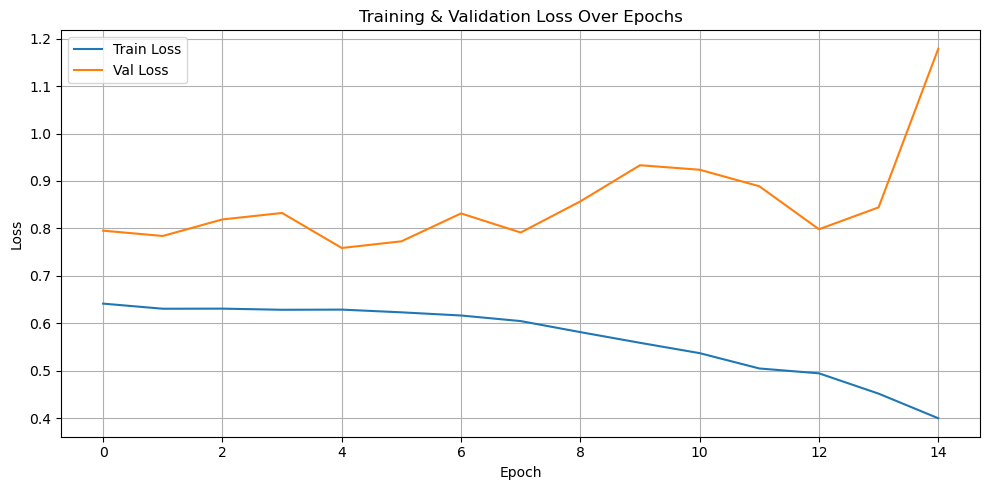

40/40 [==============================] - 0s 4ms/step


[2025-07-28 09:12:13] [INFO]: Plotting precision-recall AUC for cnn_outcome_class_bpi_2012_w2__gtr-t5-xl_text_combined_text_[2048, 1024, 512, 256, 128, 64, 32, 16]_[64, 128]_[7, 5]...


Best Threshold: 0.3677 — Precision: 0.5735, Recall: 0.1164


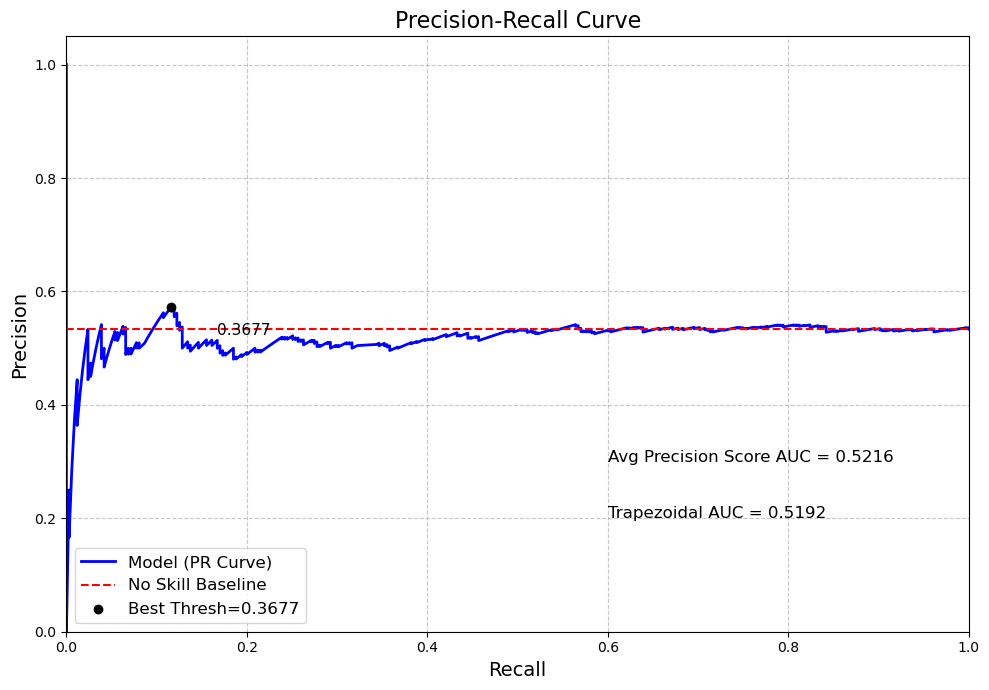

Best Threshold: 0.3731 — Precision: 0.6829, Recall: 0.0398
Compare Threshold: 0.3677 — Precision: 0.6436, Recall: 0.0923


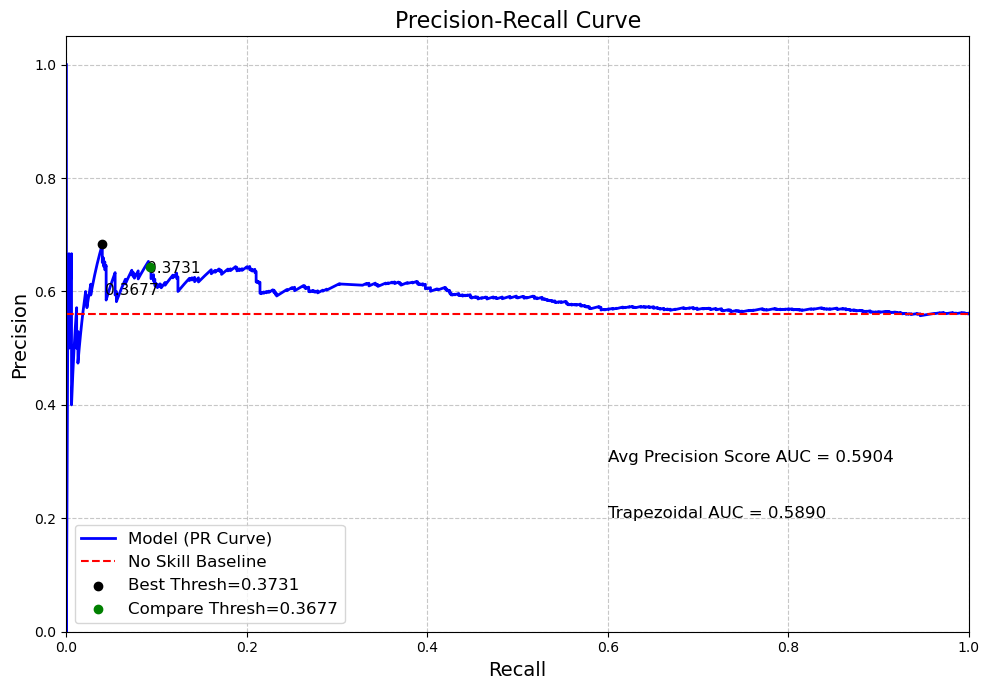

197/197 [==============================] - 1s 4ms/step


[2025-07-28 09:12:19] [INFO]: Saved labeled text data with y to data/labeled/bpi_2012/labeled_cnn_outcome_class_bpi_2012_w2__gtr-t5-xl_text_combined_text_[2048, 1024, 512, 256, 128, 64, 32, 16]_[64, 128]_[7, 5].csv
[2025-07-28 09:12:19] [INFO]: Encoded and saved y for window size 2.
[2025-07-28 09:12:19] [DEBUG]: Selected columns: ['text_combined_text']


Evaluating for window: 3, target: outcome_class, learning_rate: 0.0001, y_mode: percentile, percentile: 50


[2025-07-28 09:12:19] [DEBUG]: X constructed with shape (6280, 1024) from ['text_combined_text'].
[2025-07-28 09:12:19] [DEBUG]: [[ 0.02079481 -0.03720236  0.03875393 ... -0.03325082  0.02235201
   0.03111772]
 [ 0.01218458 -0.02097885  0.0443091  ... -0.03064308  0.0181568
   0.01083175]
 [ 0.0165077  -0.03293492  0.01180881 ... -0.03134423  0.03143863
  -0.00758428]
 ...
 [-0.01950711 -0.03885086  0.01380382 ... -0.02703111  0.03700963
  -0.00223089]
 [-0.00975181 -0.04455943  0.01861176 ... -0.01959409  0.01362904
  -0.00048971]
 [-0.00125892 -0.02168567  0.03897707 ... -0.02995482  0.02549766
   0.01705484]]
[2025-07-28 09:12:19] [INFO]: Encoding y with target='outcome_class'...
Encoding y...: 100%|██████████| 6280/6280 [00:02<00:00, 2295.27it/s]
[2025-07-28 09:12:22] [DEBUG]: Outcome class separation: mean=0.2897, std=0.0483
[2025-07-28 09:12:22] [DEBUG]: Using percentile for outcome class separation: 50%
[2025-07-28 09:12:22] [DEBUG]: Outcome class thresholds: <0.2722 or >0.3104 

Epoch 1/250
138/138 [==============================] - 6s 32ms/step - loss: 0.6458 - accuracy: 0.6606 - val_loss: 0.7063 - val_accuracy: 0.5398
Epoch 2/250
138/138 [==============================] - 4s 29ms/step - loss: 0.6416 - accuracy: 0.6622 - val_loss: 0.7147 - val_accuracy: 0.5398
Epoch 3/250
138/138 [==============================] - 4s 29ms/step - loss: 0.6402 - accuracy: 0.6622 - val_loss: 0.7351 - val_accuracy: 0.5398
Epoch 4/250
138/138 [==============================] - 4s 29ms/step - loss: 0.6386 - accuracy: 0.6622 - val_loss: 0.7480 - val_accuracy: 0.5398
Epoch 5/250
138/138 [==============================] - 4s 29ms/step - loss: 0.6333 - accuracy: 0.6622 - val_loss: 0.7312 - val_accuracy: 0.5398
Epoch 6/250
138/138 [==============================] - 4s 29ms/step - loss: 0.6279 - accuracy: 0.6622 - val_loss: 0.7132 - val_accuracy: 0.5366
Epoch 7/250
138/138 [==============================] - 4s 29ms/step - loss: 0.6072 - accuracy: 0.6722 - val_loss: 0.8407 - val_accuracy:

[2025-07-28 09:13:09] [DEBUG]: X_test shape: (1256, 1024)
[2025-07-28 09:13:09] [DEBUG]: y_test shape: (1256,)


40/40 [==============================] - 0s 4ms/step
Accuracy: 0.4666
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.92      0.60       552
           1       0.63      0.11      0.19       704

    accuracy                           0.47      1256
   macro avg       0.54      0.52      0.40      1256
weighted avg       0.55      0.47      0.37      1256



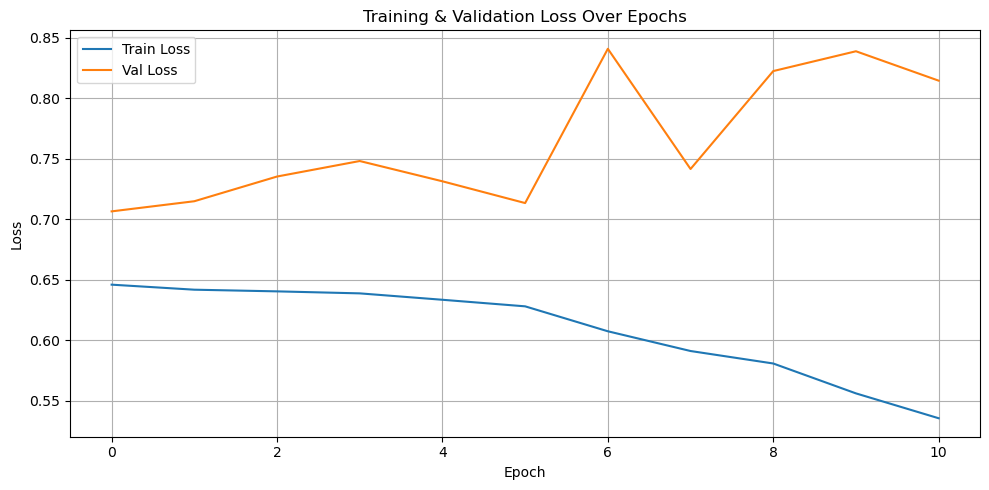

40/40 [==============================] - 0s 4ms/step


[2025-07-28 09:13:10] [INFO]: Plotting precision-recall AUC for cnn_outcome_class_bpi_2012_w3__gtr-t5-xl_text_combined_text_[2048, 1024, 512, 256, 128, 64, 32, 16]_[64, 128]_[7, 5]...


Best Threshold: 0.3746 — Precision: 0.5714, Recall: 0.0277


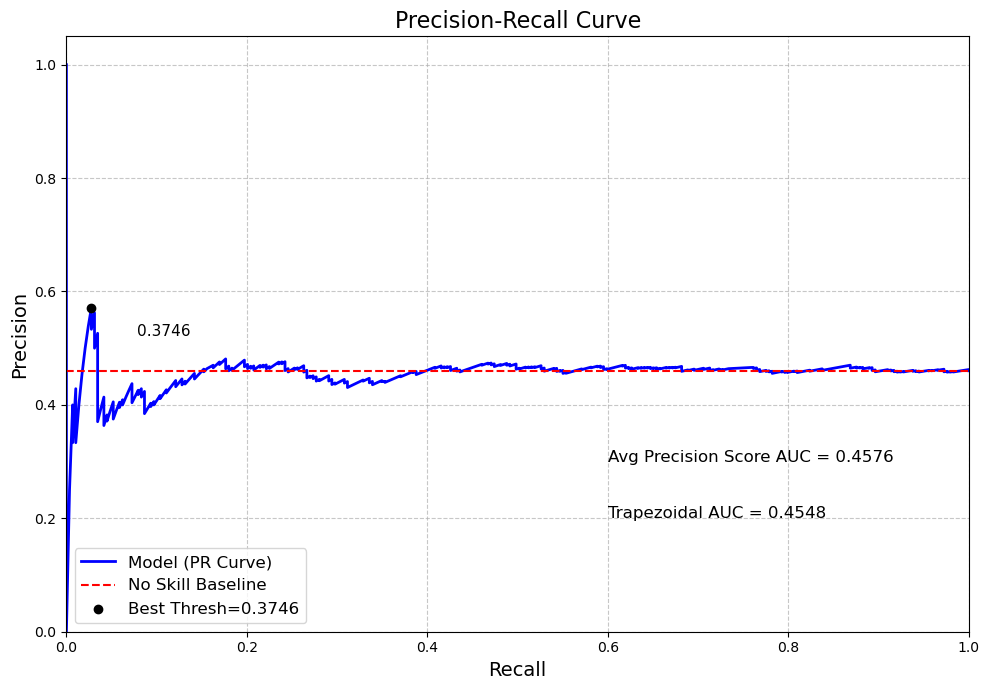

Best Threshold: 0.3738 — Precision: 0.6623, Recall: 0.0724
Compare Threshold: 0.3746 — Precision: 0.6087, Recall: 0.0199


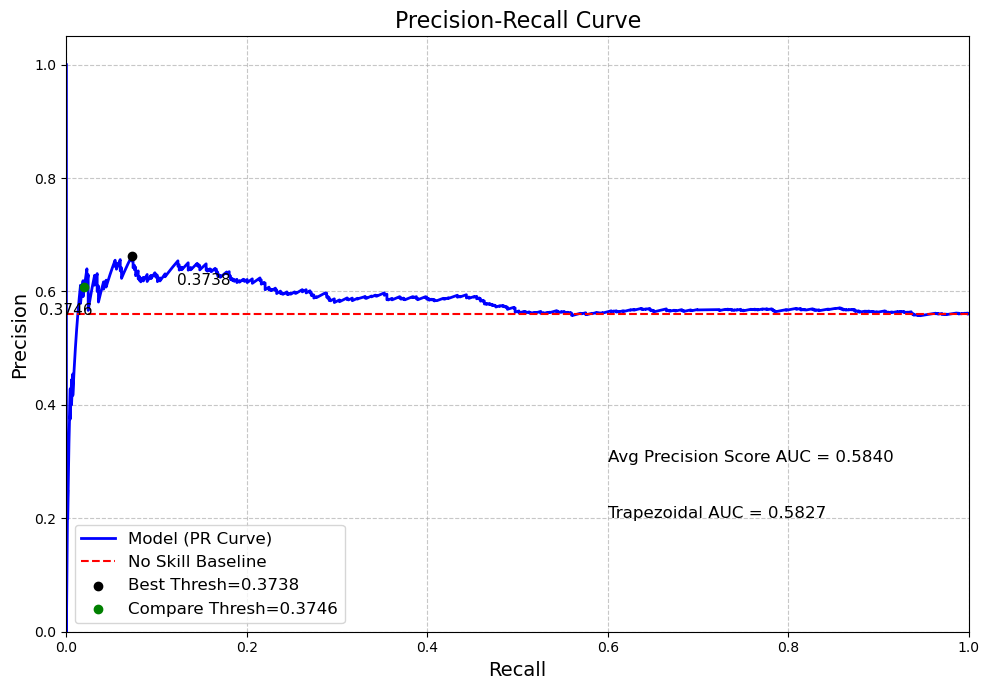

197/197 [==============================] - 1s 4ms/step


[2025-07-28 09:13:15] [INFO]: Saved labeled text data with y to data/labeled/bpi_2012/labeled_cnn_outcome_class_bpi_2012_w3__gtr-t5-xl_text_combined_text_[2048, 1024, 512, 256, 128, 64, 32, 16]_[64, 128]_[7, 5].csv
[2025-07-28 09:13:15] [INFO]: Encoded and saved y for window size 3.


In [4]:
update_repository()
#Evaluate 
from evaluate import evaluate_allocation

folder_name = "simulated_loan_application"
folder_name = "bpi_2017"
folder_name = "bpi_2012"

text_file = f"nyt_{folder_name}.csv"
log_file = f"{folder_name}.xes"

if folder_name == "simulated_loan_application":
    feature_columns=["text_abstract"]
    allowed_sections = None
elif folder_name == "bpi_2012" or folder_name == "bpi_2017":
    feature_columns=["text_combined_text"]
    allowed_sections = ["business day", "world"]
    allowed_sections = ["Business Day"]

# set hyperparameters
architecture = "mlp"
architecture = "cnn"
hidden_units=[4096, 2048, 1024, 512, 256, 128, 64, 32, 16]
hidden_units=[2048, 1024, 512, 256, 128, 64, 32, 16]
time_windows = range(1, 15, 1)  # 1 to 14 days
time_windows = [1, 2, 3]
time_windows = [1]
time_windows = [1, 2, 3]
y_modes = ["percentile"]
percentiles = [50]
learning_rates = [0.01, .001, 0.0001, 0.00001]
learning_rates = [0.0001]
conv_kernel_size = [7, 5]
conv_filters = [64, 128]
targets = ["outcome_class", "outcome"]
targets = ["remaining_time_class"]
targets = ["outcome_class"]
umap_columns=[]
umap_components=10
patience = 10


# build paths
text_dir = os.path.join("data", "raw_nyt_data")
log_dir = os.path.join("data", "raw_logs")
data_dir = os.path.join("data", "training", folder_name)
os.makedirs(data_dir, exist_ok=True)
features_path = os.path.join(data_dir, "features_df.pkl")

# build text_df
text_df = pd.read_csv(os.path.join(text_dir, text_file))
text_df = convert_to_datetime(text_df, "pub_date")

# prefilter for sections
if allowed_sections is not None:
    text_df = text_df[text_df["section_name"].isin(allowed_sections)].copy()

# build event_df
log_df = pm4py.read_xes(os.path.join(log_dir, log_file))
event_df = build_event_df(log_df)
print(event_df["status"].value_counts())

# load or build features_df
if os.path.exists(features_path):
    features_df = pd.read_pickle(features_path)
    if len(features_df) != len(text_df):
        print("features_df row count does not match text_df. Rebuilding features_df...")
        print(f"columns in text: {text_df.columns.tolist()}")
        features_df = encode_features(text_df)
        features_df.to_pickle(features_path)
else:
    features_df = encode_features(text_df)
    features_df.to_pickle(features_path)
print(f"feature_columns: {features_df.columns.tolist()}")

# filter text_df and features_df according to allowed sections
if allowed_sections is not None:
    text_df = text_df[text_df["section_name"].isin(allowed_sections)].copy()
    features_df = features_df.loc[text_df.index].copy()



# evaluation
for learning_rate in learning_rates:
    for window in time_windows:
        for y_mode in y_modes:
            for percentile in percentiles:
                for target in targets:
                    print(f"Evaluating for window: {window}, target: {target}, learning_rate: {learning_rate}, y_mode: {y_mode}, percentile: {percentile}")
                    evaluate_allocation(
                        folder_name=folder_name,
                        text_df=text_df,
                        event_df=event_df,
                        features_df=features_df,
                        architecture=architecture,
                        target=target,
                        umap_components=umap_components,
                        umap_columns=umap_columns,
                        feature_columns=feature_columns,
                        time_window=window,
                        y_mode=y_mode,
                        hidden_units=hidden_units,
                        conv_kernel_sizes=conv_kernel_size,
                        conv_filters=conv_filters,
                        percentile=percentile,
                        learning_rate=learning_rate,
                        patience=patience,
                    )

# Evaluate Monitoring Simple

Updating the git repository...
Already up to date.



parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

[2025-07-10 08:39:34] [INFO]: Index(['org:resource', 'lifecycle:transition', 'concept:name',
       'time:timestamp', 'headline_pos', 'headline_neg', 'headline_neu',
       'snippet_pos', 'snippet_neg', 'snippet_neu', 'case:REG_DATE',
       'case:concept:name', 'case:AMOUNT_REQ'],
      dtype='object')
[2025-07-10 08:39:34] [INFO]: Events: 262200
[2025-07-10 08:39:34] [INFO]: Cases: 13087
[2025-07-10 08:39:34] [INFO]: Activities: 24
[2025-07-10 08:39:34] [INFO]: Resources: 68
[2025-07-10 08:39:34] [INFO]: Start: 2011-10-01 00:38:44.546000, End: 2012-03-14 16:04:54.681000
[2025-07-10 08:39:34] [INFO]: Events/case avg: 20.04, max: 175, min: 3


Evaluating for window: 0, target: outcome_class_state, learning_rate: 0.0005, n_gram: 1, architecture: mlp


[2025-07-10 08:39:34] [INFO]: Missing values: org:resource=18010
[2025-07-10 08:39:36] [INFO]: Cases with disordered timestamps: 0
[2025-07-10 08:39:36] [INFO]: Preparing data...
[2025-07-10 08:39:36] [INFO]: Number of relevant articles: 70 out of 6280
Processing cases: 100%|██████████| 13087/13087 [02:23<00:00, 91.12it/s] 
[2025-07-10 08:42:00] [DEBUG]: Final feature shape: (249113, 25)
[2025-07-10 08:42:00] [DEBUG]: Final label shape: (249113, 3)
[2025-07-10 08:42:01] [DEBUG]: Label [0, 0, 1]: 72901 samples
[2025-07-10 08:42:01] [DEBUG]: Label [0, 1, 0]: 54407 samples
[2025-07-10 08:42:01] [DEBUG]: Label [1, 0, 0]: 121805 samples
[2025-07-10 08:42:01] [INFO]: Building classification model with input dimension: 25
[2025-07-10 08:42:01] [INFO]: Hidden units: [256, 128, 64, 32, 16]


Epoch 1/250
5450/5450 [==============================] - 20s 3ms/step - loss: 0.8671 - accuracy: 0.5828 - val_loss: 0.8693 - val_accuracy: 0.5856
Epoch 2/250
5450/5450 [==============================] - 19s 3ms/step - loss: 0.8560 - accuracy: 0.5889 - val_loss: 0.8649 - val_accuracy: 0.5856
Epoch 3/250
5450/5450 [==============================] - 19s 3ms/step - loss: 0.8536 - accuracy: 0.5907 - val_loss: 0.8645 - val_accuracy: 0.5761
Epoch 4/250
5450/5450 [==============================] - 19s 3ms/step - loss: 0.8523 - accuracy: 0.5917 - val_loss: 0.8626 - val_accuracy: 0.5915
Epoch 5/250
5450/5450 [==============================] - 18s 3ms/step - loss: 0.8513 - accuracy: 0.5915 - val_loss: 0.8669 - val_accuracy: 0.5846
Epoch 6/250
5450/5450 [==============================] - 18s 3ms/step - loss: 0.8507 - accuracy: 0.5923 - val_loss: 0.8662 - val_accuracy: 0.5831
Epoch 7/250
5450/5450 [==============================] - 18s 3ms/step - loss: 0.8500 - accuracy: 0.5927 - val_loss: 0.8655 -

[2025-07-10 08:46:22] [DEBUG]: X_test shape: (49823, 25)
[2025-07-10 08:46:22] [DEBUG]: y_test shape: (49823, 3)


1557/1557 [==============================] - 2s 1ms/step


[2025-07-10 08:46:24] [DEBUG]: y_pred shape: (49823, 3)
[2025-07-10 08:46:24] [DEBUG]: y_classes shape: (49823,)
[2025-07-10 08:46:24] [DEBUG]: y_pred_classes shape: (49823,)
[2025-07-10 08:46:24] [INFO]: Label 0: 23306 samples
[2025-07-10 08:46:24] [INFO]: Label 1: 10315 samples
[2025-07-10 08:46:24] [INFO]: Label 2: 16202 samples
[2025-07-10 08:46:24] [INFO]: Model mlp_monitoring_bpi_2012_w0_n1 evaluated with accuracy: 0.5753969050438552


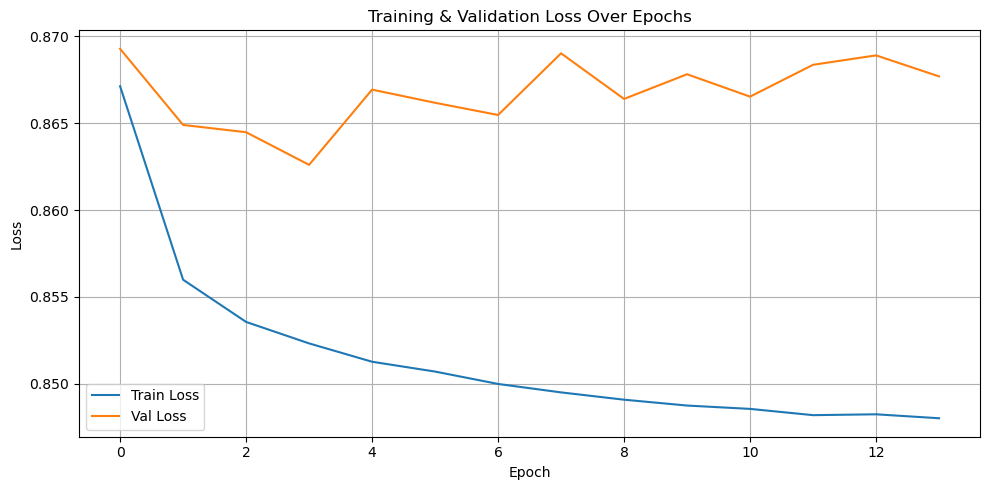

[2025-07-10 08:46:25] [INFO]: Events: 262200
[2025-07-10 08:46:25] [INFO]: Cases: 13087
[2025-07-10 08:46:25] [INFO]: Activities: 24
[2025-07-10 08:46:25] [INFO]: Resources: 68
[2025-07-10 08:46:25] [INFO]: Start: 2011-10-01 00:38:44.546000, End: 2012-03-14 16:04:54.681000
[2025-07-10 08:46:25] [INFO]: Events/case avg: 20.04, max: 175, min: 3


Evaluating for window: 1, target: outcome_class_state, learning_rate: 0.0005, n_gram: 1, architecture: mlp


[2025-07-10 08:46:25] [INFO]: Missing values: org:resource=18010
[2025-07-10 08:46:26] [INFO]: Cases with disordered timestamps: 0
[2025-07-10 08:46:26] [INFO]: Preparing data...
/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
[2025-07-10 08:46:35] [INFO]: Number of relevant articles: 70 out of 6280
Processing cases: 100%|██████████| 13087/13087 [09:54<00:00, 22.01it/s]
[2025-07-10 08:56:31] [DEBUG]: Final feature shape: (249113, 28)
[2025-07-10 08:56:31] [DEBUG]: Final label shape: (249113, 3)
[2025-07-10 08:56:31] [DEBUG]: Label [0, 0, 1]: 72901 samples
[2025-07-10 08:56:31] [DEBUG]: Label [0, 1, 0]: 54407 samples
[2025-07-10 08:56:31] [DEBUG]: Label [1, 0, 0]: 121805 samples
[2025-07-10 08:56:32] [INFO]: Building classification model with input dimension: 28
[2025-07-10 08:56:32] [INFO]: Hidden units: [256, 128, 64, 32, 16]


Epoch 1/250
5450/5450 [==============================] - 20s 3ms/step - loss: 0.8827 - accuracy: 0.5770 - val_loss: 0.8825 - val_accuracy: 0.5765
Epoch 2/250
5450/5450 [==============================] - 18s 3ms/step - loss: 0.8645 - accuracy: 0.5851 - val_loss: 0.8779 - val_accuracy: 0.5782
Epoch 3/250
5450/5450 [==============================] - 18s 3ms/step - loss: 0.8607 - accuracy: 0.5864 - val_loss: 0.8791 - val_accuracy: 0.5778
Epoch 4/250
5450/5450 [==============================] - 19s 3ms/step - loss: 0.8567 - accuracy: 0.5889 - val_loss: 0.8720 - val_accuracy: 0.5670
Epoch 5/250
5450/5450 [==============================] - 18s 3ms/step - loss: 0.8541 - accuracy: 0.5916 - val_loss: 0.8663 - val_accuracy: 0.5837
Epoch 6/250
5450/5450 [==============================] - 18s 3ms/step - loss: 0.8526 - accuracy: 0.5922 - val_loss: 0.8650 - val_accuracy: 0.5831
Epoch 7/250
5450/5450 [==============================] - 19s 3ms/step - loss: 0.8516 - accuracy: 0.5931 - val_loss: 0.8701 -

[2025-07-10 09:01:29] [DEBUG]: X_test shape: (49823, 28)
[2025-07-10 09:01:29] [DEBUG]: y_test shape: (49823, 3)


1557/1557 [==============================] - 2s 1ms/step


[2025-07-10 09:01:32] [DEBUG]: y_pred shape: (49823, 3)
[2025-07-10 09:01:32] [DEBUG]: y_classes shape: (49823,)
[2025-07-10 09:01:32] [DEBUG]: y_pred_classes shape: (49823,)
[2025-07-10 09:01:32] [INFO]: Label 0: 23306 samples
[2025-07-10 09:01:32] [INFO]: Label 1: 10315 samples
[2025-07-10 09:01:32] [INFO]: Label 2: 16202 samples
[2025-07-10 09:01:32] [INFO]: Model mlp_monitoring_bpi_2012_w1_n1 evaluated with accuracy: 0.5685326054231982


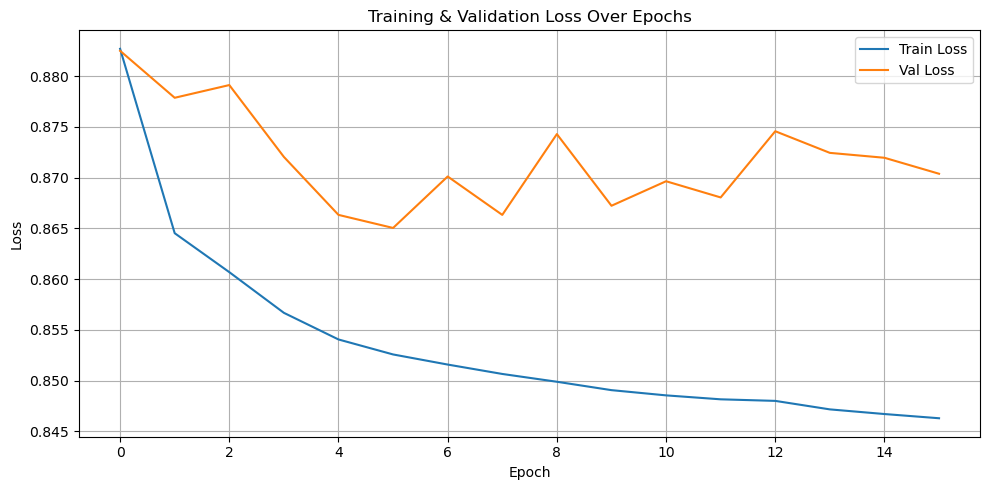

   time_window  max_recent_articles  n_gram  accuracy
0            0                    1       1  0.575397
1            1                    1       1  0.568533


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

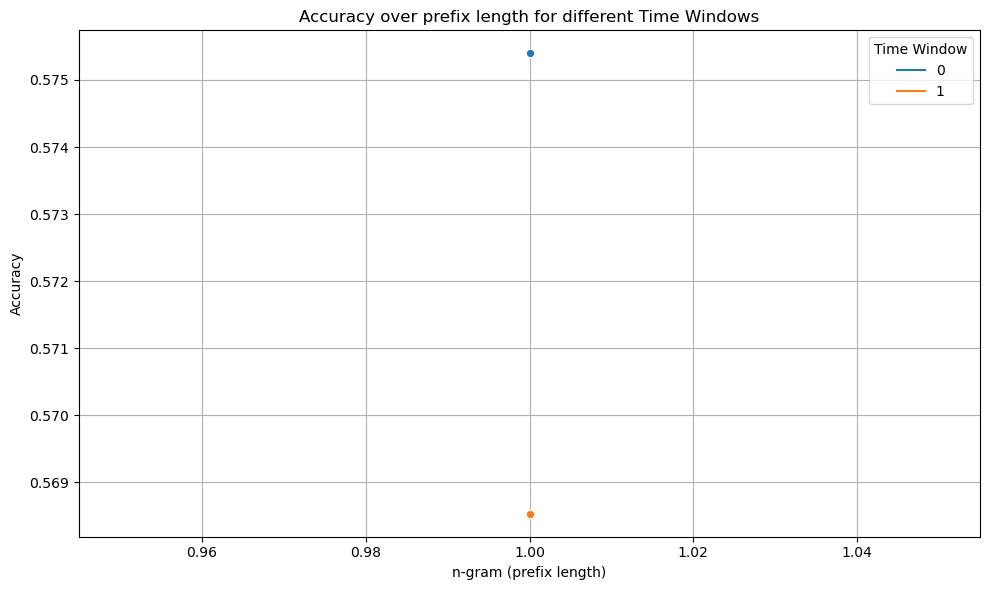

In [7]:
update_repository()
# evaluate for various hyperparameters
from evaluate import evaluate_monitoring
from plotting import plot_time_window_comparison_over_prefix_length

folder_name = "simulated_loan_application"
folder_name = "bpi_2017"
folder_name = "bpi_2012"

#log_file = f"{folder_name}.xes"
log_file = f"{folder_name}_enriched.xes"

# set hyperparameters
#architecture = "cnn"
#architecture = "xgboost"
architecture = "mlp"
#hidden_units=[4096, 2048, 1024, 512, 256, 128, 64, 32, 16]
hidden_units=[256, 128, 64, 32, 16]
learning_rates = [0.0005]
conv_kernel_size = [7, 5]
conv_filters = [64, 128]
patience = 10
cat_attributes = []
num_attributes = []
#max_recent_articles = None
max_recent_articles = 1
umap_components = 3
time_windows = [0, 1]
n_grams = [1]
#target = "remaining_time"
target = "remaining_time_state"
target = "outcome_class_state"

# set parameters simulated_loan_application
if folder_name == "simulated_loan_application":
    text_file = "labeled_cnn_outcome_class_simulated_loan_application_w1__gtr-t5-xl_text_abstract_[2048, 1024, 512, 256, 128, 64, 32, 16]_[64, 128]_[7, 5].csv"
    threshold = 0.72
    reduced = False

# set parameters bpi_2012
if folder_name == "bpi_2012":
    if "outcome_class" in target:
        text_file = f"labeled_cnn_outcome_class_bpi_2012_w1__gtr-t5-xl_text_combined_text_[2048, 1024, 512, 256, 128, 64, 32, 16]_[64, 128]_[7, 5].csv"
        threshold = 0.45
    else:
        text_file = f"labeled_cnn_remaining_time_class_bpi_2012_w1__gtr-t5-xl_text_combined_text_[2048, 1024, 512, 256, 128, 64, 32, 16]_[64, 128]_[7, 5].csv"
        threshold = 0.5
    #log_df = log_df[log_df["concept:name"].str.startswith('A_')]
    num_attributes = ["case:AMOUNT_REQ"]
    reduced = False

# set parameters bpi_2017
if folder_name == "bpi_2017":
    text_file = "labeled_cnn_remaining_time_class_bpi_2017_w1__gtr-t5-xl_text_combined_text_[2048, 1024, 512, 256, 128, 64, 32, 16]_[64, 128]_[7, 5].csv"
    hidden_units=[256, 128, 64, 32, 16]
    max_recent_articles = 1
    threshold = 0.5048
    reduced = True

# build paths
text_dir = os.path.join("data", "labeled", folder_name)
log_dir = os.path.join("data", "raw_logs")

# build text_df
text_df = pd.read_csv(os.path.join(text_dir, text_file))
text_df = convert_to_datetime(text_df, "pub_date")

# build event_df
log_df = pm4py.read_xes(os.path.join(log_dir, log_file))
log_df = convert_to_datetime(log_df, "time:timestamp")
log.info(log_df.columns)
if reduced:
    n = 5
    case_id_col = "case:concept:name"
    every_nth_case_ids = log_df[case_id_col].drop_duplicates().iloc[::n]
    log_df = log_df[log_df[case_id_col].isin(every_nth_case_ids)]

# evaluation
results = []
for learning_rate in learning_rates:
    for n_gram in n_grams:
        for time_window in time_windows:
            print(f"Evaluating for window: {time_window}, target: {target}, learning_rate: {learning_rate}, n_gram: {n_gram}, architecture: {architecture}")
            accuracy = evaluate_monitoring(
                folder_name=folder_name,
                text_df=text_df,
                log_df=log_df,
                architecture=architecture,
                target=target,
                n_gram=n_gram,
                time_window=time_window,
                threshold=threshold,
                cat_attributes=cat_attributes,
                num_attributes=num_attributes,
                hidden_units=hidden_units,
                conv_kernel_sizes=conv_kernel_size,
                conv_filters=conv_filters,
                learning_rate=learning_rate,
                patience=patience,
                umap_components=umap_components,
                max_recent_articles=max_recent_articles,
            )
            results.append({
                'time_window': time_window,
                'max_recent_articles': max_recent_articles,
                'n_gram': n_gram,
                'accuracy': accuracy
            })

results_df = pd.DataFrame(results)
print(results_df)
aggregated_df = results_df.groupby(['time_window', 'n_gram'], as_index=False)['accuracy'].mean()
plot_time_window_comparison_over_prefix_length(aggregated_df)

In [ ]:
assert False, "Done and dusted!"

AssertionError: Done and dusted!

# Evaluate Monitoring CNN

Updating the git repository...
Already up to date.



/opt/conda/lib/python3.10/site-packages/pm4py/util/dt_parsing/parser.py:82: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

Index(['org:resource', 'lifecycle:transition', 'concept:name',
       'time:timestamp', 'case:REG_DATE', 'case:concept:name',
       'case:AMOUNT_REQ'],
      dtype='object')


[2025-07-29 07:18:09] [INFO]: Encoding features and preparing data...
[2025-07-29 07:18:09] [INFO]: Found cached files for parameters: t_outcome_w1_th0.5_mra8_numcase:AMOUNT_REQ_catnone. Loading X and y.


Evaluating for window: 1, target: outcome, n_gram: 1, architecture: cnn


[2025-07-29 07:18:20] [DEBUG]: Activity dim: 24, Attr dim: 1, Num articles: 8, Embedding dim: 1024
[2025-07-29 07:18:20] [DEBUG]: Adding CNN layer 0: filters=256, kernel_size=1, pooling=1
[2025-07-29 07:18:21] [DEBUG]: Adding CNN layer 1: filters=128, kernel_size=3, pooling=2


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 news_input (InputLayer)     [(None, 8, 1024)]            0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 8, 256)               262400    ['news_input[0][0]']          
                                                                                                  
 max_pooling1d (MaxPooling1  (None, 8, 256)               0         ['conv1d[0][0]']              
 D)                                                                                               
                                                                                                  
 dropout (Dropout)           (None, 8, 256)               0         ['max_pooling1d[0][0]']   

[2025-07-29 07:26:10] [INFO]: [remaining_time_bpi_2012_cnn] Classification Report:
              precision    recall  f1-score   support

           0     0.6286    0.4445    0.5208     15608
           1     0.7677    0.8748    0.8178     32755

    accuracy                         0.7360     48363
   macro avg     0.6981    0.6597    0.6693     48363
weighted avg     0.7228    0.7360    0.7219     48363

[2025-07-29 07:26:10] [INFO]: [remaining_time_bpi_2012_cnn] Accuracy: 0.7360, F1 Score: 0.7219
[2025-07-29 07:26:10] [INFO]: Evaluation for remaining_time_bpi_2012_cnn: MAE: 0.7360, MSE: 0.7219, R²: 0.0000


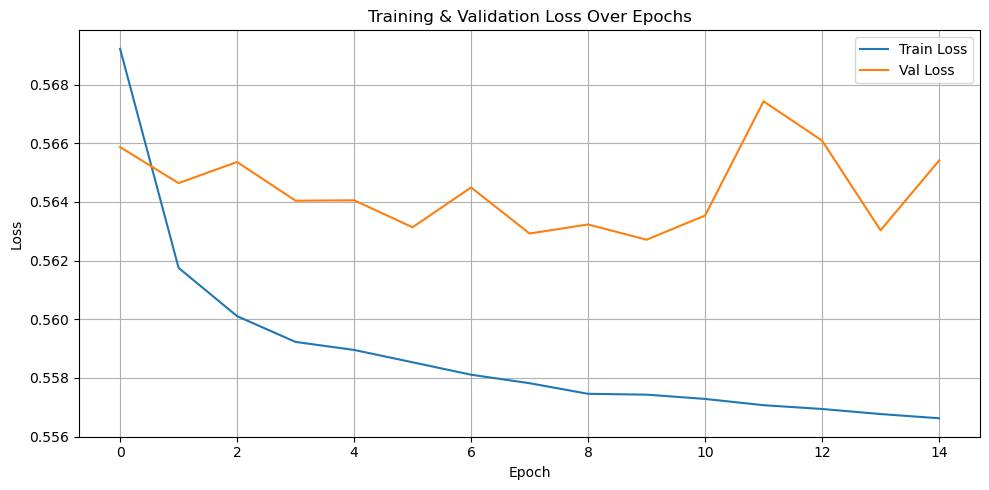

[2025-07-29 07:26:12] [INFO]: Encoding features and preparing data...
[2025-07-29 07:26:12] [INFO]: Found cached files for parameters: t_outcome_w1_th0.5_mra8_numcase:AMOUNT_REQ_catnone. Loading X and y.


Evaluating for window: 1, target: outcome, n_gram: 1, architecture: cnn


[2025-07-29 07:26:17] [DEBUG]: Activity dim: 24, Attr dim: 1, Num articles: 8, Embedding dim: 1024
[2025-07-29 07:26:17] [DEBUG]: Adding CNN layer 0: filters=256, kernel_size=1, pooling=1
[2025-07-29 07:26:17] [DEBUG]: Adding CNN layer 1: filters=128, kernel_size=3, pooling=2


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 news_input (InputLayer)     [(None, 8, 1024)]            0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 8, 256)               262400    ['news_input[0][0]']          
                                                                                                  
 max_pooling1d (MaxPooling1  (None, 8, 256)               0         ['conv1d[0][0]']              
 D)                                                                                               
                                                                                                  
 dropout (Dropout)           (None, 8, 256)               0         ['max_pooling1d[0][0]']   

[2025-07-29 07:31:21] [INFO]: [remaining_time_bpi_2012_cnn] Classification Report:
              precision    recall  f1-score   support

           0     0.5985    0.4837    0.5350     15608
           1     0.7746    0.8454    0.8084     32755

    accuracy                         0.7287     48363
   macro avg     0.6866    0.6646    0.6717     48363
weighted avg     0.7178    0.7287    0.7202     48363

[2025-07-29 07:31:21] [INFO]: [remaining_time_bpi_2012_cnn] Accuracy: 0.7287, F1 Score: 0.7202
[2025-07-29 07:31:21] [INFO]: Evaluation for remaining_time_bpi_2012_cnn: MAE: 0.7287, MSE: 0.7202, R²: 0.0000


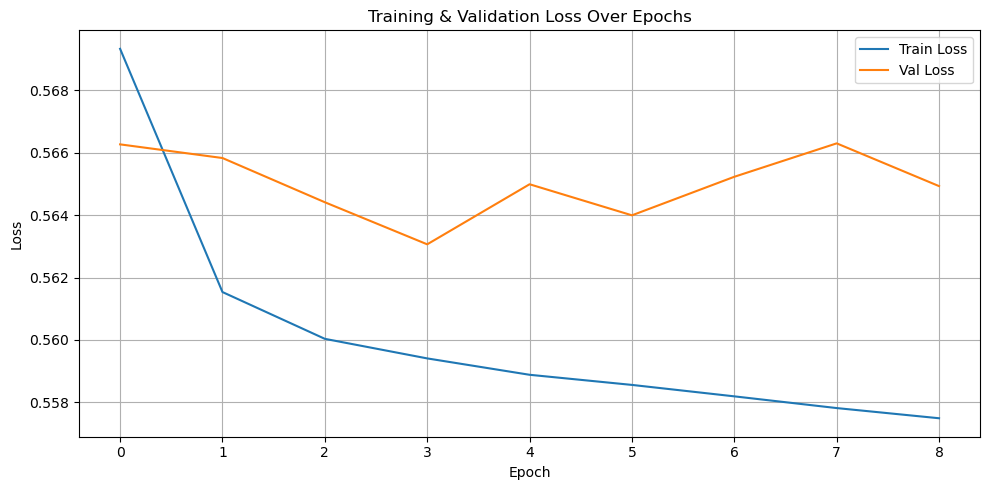

[2025-07-29 07:31:23] [INFO]: Encoding features and preparing data...
[2025-07-29 07:31:23] [INFO]: Found cached files for parameters: t_outcome_w1_th0.5_mra8_numcase:AMOUNT_REQ_catnone. Loading X and y.


Evaluating for window: 1, target: outcome, n_gram: 1, architecture: cnn


[2025-07-29 07:31:28] [DEBUG]: Activity dim: 24, Attr dim: 1, Num articles: 8, Embedding dim: 1024
[2025-07-29 07:31:28] [DEBUG]: Adding CNN layer 0: filters=256, kernel_size=1, pooling=1
[2025-07-29 07:31:28] [DEBUG]: Adding CNN layer 1: filters=128, kernel_size=3, pooling=2


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 news_input (InputLayer)     [(None, 8, 1024)]            0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 8, 256)               262400    ['news_input[0][0]']          
                                                                                                  
 max_pooling1d (MaxPooling1  (None, 8, 256)               0         ['conv1d[0][0]']              
 D)                                                                                               
                                                                                                  
 dropout (Dropout)           (None, 8, 256)               0         ['max_pooling1d[0][0]']   

[2025-07-29 07:37:02] [INFO]: [remaining_time_bpi_2012_cnn] Classification Report:
              precision    recall  f1-score   support

           0     0.6152    0.4623    0.5279     15608
           1     0.7709    0.8622    0.8140     32755

    accuracy                         0.7332     48363
   macro avg     0.6931    0.6623    0.6710     48363
weighted avg     0.7207    0.7332    0.7217     48363

[2025-07-29 07:37:02] [INFO]: [remaining_time_bpi_2012_cnn] Accuracy: 0.7332, F1 Score: 0.7217
[2025-07-29 07:37:02] [INFO]: Evaluation for remaining_time_bpi_2012_cnn: MAE: 0.7332, MSE: 0.7217, R²: 0.0000


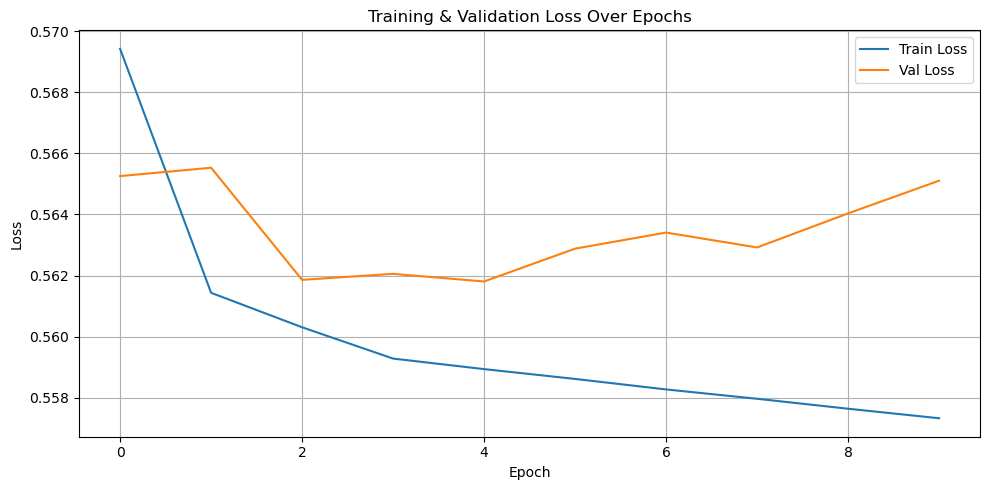

[2025-07-29 07:37:04] [INFO]: Encoding features and preparing data...
[2025-07-29 07:37:04] [INFO]: Found cached files for parameters: t_outcome_w1_th0.5_mra8_numcase:AMOUNT_REQ_catnone. Loading X and y.


Evaluating for window: 1, target: outcome, n_gram: 1, architecture: cnn


[2025-07-29 07:37:08] [DEBUG]: Activity dim: 24, Attr dim: 1, Num articles: 8, Embedding dim: 1024
[2025-07-29 07:37:08] [DEBUG]: Adding CNN layer 0: filters=256, kernel_size=1, pooling=1
[2025-07-29 07:37:08] [DEBUG]: Adding CNN layer 1: filters=128, kernel_size=3, pooling=2


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 news_input (InputLayer)     [(None, 8, 1024)]            0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 8, 256)               262400    ['news_input[0][0]']          
                                                                                                  
 max_pooling1d (MaxPooling1  (None, 8, 256)               0         ['conv1d[0][0]']              
 D)                                                                                               
                                                                                                  
 dropout (Dropout)           (None, 8, 256)               0         ['max_pooling1d[0][0]']   

[2025-07-29 07:41:40] [INFO]: [remaining_time_bpi_2012_cnn] Classification Report:
              precision    recall  f1-score   support

           0     0.5895    0.4782    0.5280     15608
           1     0.7719    0.8413    0.8051     32755

    accuracy                         0.7241     48363
   macro avg     0.6807    0.6597    0.6666     48363
weighted avg     0.7130    0.7241    0.7157     48363

[2025-07-29 07:41:40] [INFO]: [remaining_time_bpi_2012_cnn] Accuracy: 0.7241, F1 Score: 0.7157
[2025-07-29 07:41:40] [INFO]: Evaluation for remaining_time_bpi_2012_cnn: MAE: 0.7241, MSE: 0.7157, R²: 0.0000


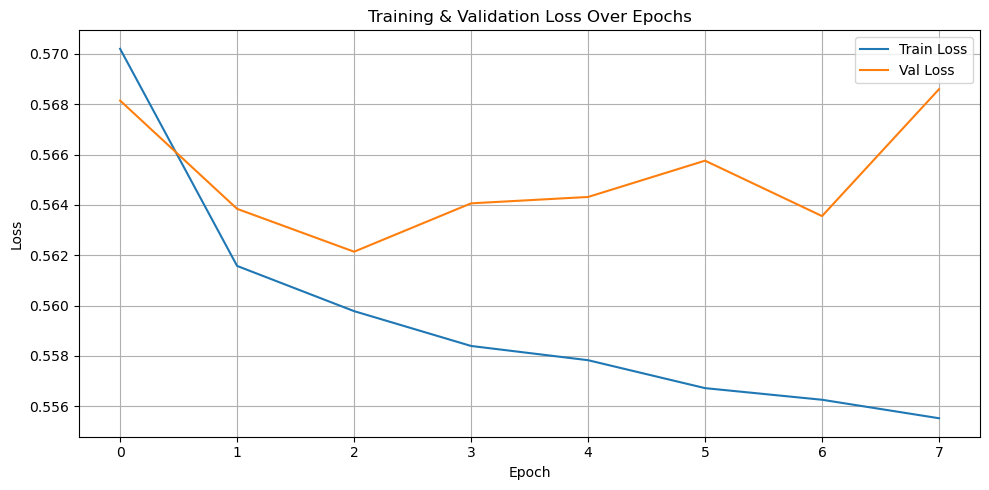

[2025-07-29 07:41:42] [INFO]: Encoding features and preparing data...
[2025-07-29 07:41:42] [INFO]: Found cached files for parameters: t_outcome_w1_th0.5_mra8_numcase:AMOUNT_REQ_catnone. Loading X and y.


Evaluating for window: 1, target: outcome, n_gram: 1, architecture: cnn


[2025-07-29 07:41:47] [DEBUG]: Activity dim: 24, Attr dim: 1, Num articles: 8, Embedding dim: 1024
[2025-07-29 07:41:47] [DEBUG]: Adding CNN layer 0: filters=256, kernel_size=1, pooling=1
[2025-07-29 07:41:47] [DEBUG]: Adding CNN layer 1: filters=128, kernel_size=3, pooling=2


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 news_input (InputLayer)     [(None, 8, 1024)]            0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 8, 256)               262400    ['news_input[0][0]']          
                                                                                                  
 max_pooling1d (MaxPooling1  (None, 8, 256)               0         ['conv1d[0][0]']              
 D)                                                                                               
                                                                                                  
 dropout (Dropout)           (None, 8, 256)               0         ['max_pooling1d[0][0]']   

[2025-07-29 07:48:19] [INFO]: [remaining_time_bpi_2012_cnn] Classification Report:
              precision    recall  f1-score   support

           0     0.6384    0.4138    0.5021     15608
           1     0.7608    0.8883    0.8196     32755

    accuracy                         0.7352     48363
   macro avg     0.6996    0.6510    0.6609     48363
weighted avg     0.7213    0.7352    0.7171     48363

[2025-07-29 07:48:19] [INFO]: [remaining_time_bpi_2012_cnn] Accuracy: 0.7352, F1 Score: 0.7171
[2025-07-29 07:48:19] [INFO]: Evaluation for remaining_time_bpi_2012_cnn: MAE: 0.7352, MSE: 0.7171, R²: 0.0000


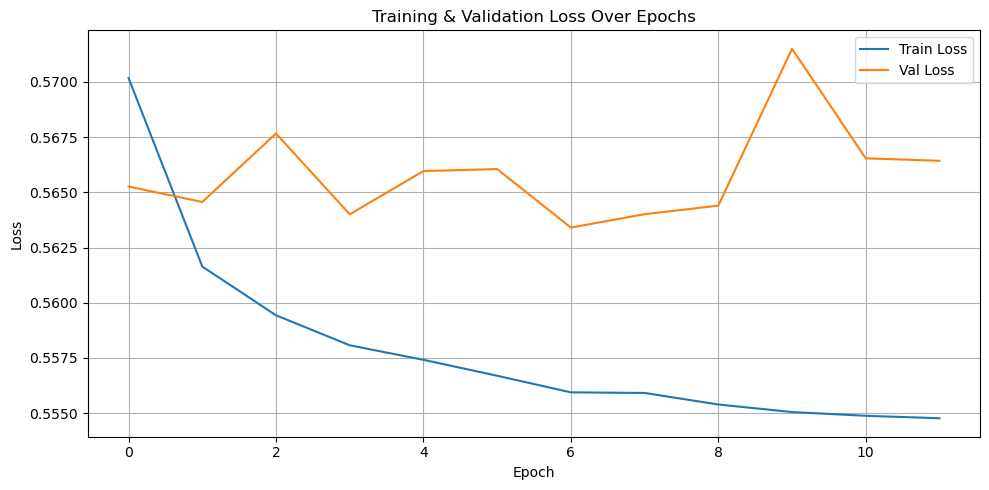

[2025-07-29 07:48:22] [INFO]: Encoding features and preparing data...
[2025-07-29 07:48:22] [INFO]: Found cached files for parameters: t_outcome_w0_th0.5_mra8_numcase:AMOUNT_REQ_catnone. Loading X and y.
[2025-07-29 07:48:22] [DEBUG]: Activity dim: 24, Attr dim: 1, Num articles: 0, Embedding dim: 0


Evaluating for window: 0, target: outcome, n_gram: 1, architecture: cnn
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 activity_input (InputLayer  [(None, 24)]                 0         []                            
 )                                                                                                
                                                                                                  
 attributes_input (InputLay  [(None, 1)]                  0         []                            
 er)                                                                                              
                                                                                                  
 concatenate (Concatenate)   (None, 25)                   0         ['activity_input[0][0]',      
                      

[2025-07-29 07:50:48] [INFO]: [remaining_time_bpi_2012_cnn] Classification Report:
              precision    recall  f1-score   support

           0     0.6486    0.3997    0.4946     15608
           1     0.7582    0.8968    0.8217     32755

    accuracy                         0.7364     48363
   macro avg     0.7034    0.6482    0.6581     48363
weighted avg     0.7228    0.7364    0.7161     48363

[2025-07-29 07:50:48] [INFO]: [remaining_time_bpi_2012_cnn] Accuracy: 0.7364, F1 Score: 0.7161
[2025-07-29 07:50:48] [INFO]: Evaluation for remaining_time_bpi_2012_cnn: MAE: 0.7364, MSE: 0.7161, R²: 0.0000


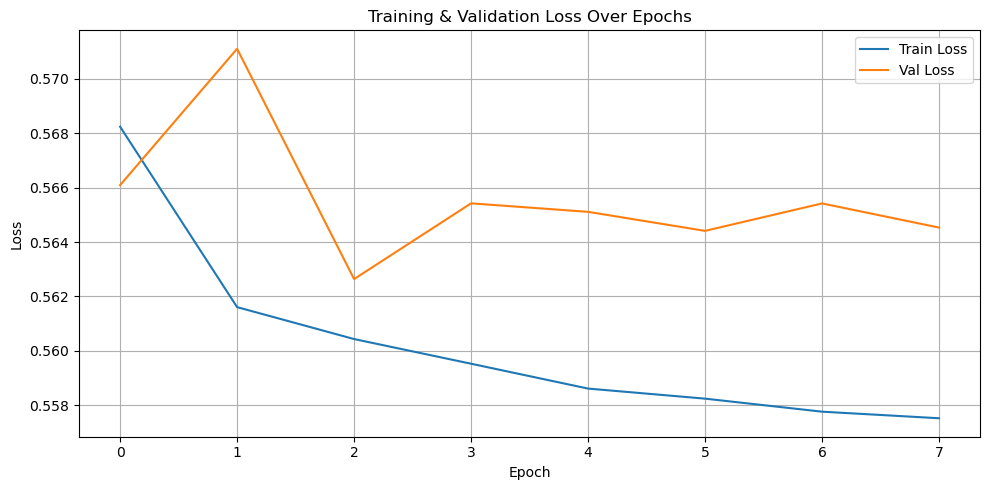

[2025-07-29 07:50:49] [INFO]: Encoding features and preparing data...
[2025-07-29 07:50:49] [INFO]: Found cached files for parameters: t_outcome_w0_th0.5_mra8_numcase:AMOUNT_REQ_catnone. Loading X and y.
[2025-07-29 07:50:49] [DEBUG]: Activity dim: 24, Attr dim: 1, Num articles: 0, Embedding dim: 0


Evaluating for window: 0, target: outcome, n_gram: 1, architecture: cnn
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 activity_input (InputLayer  [(None, 24)]                 0         []                            
 )                                                                                                
                                                                                                  
 attributes_input (InputLay  [(None, 1)]                  0         []                            
 er)                                                                                              
                                                                                                  
 concatenate (Concatenate)   (None, 25)                   0         ['activity_input[0][0]',      
                      

[2025-07-29 07:54:20] [INFO]: [remaining_time_bpi_2012_cnn] Classification Report:
              precision    recall  f1-score   support

           0     0.5998    0.4538    0.5167     15608
           1     0.7668    0.8557    0.8088     32755

    accuracy                         0.7260     48363
   macro avg     0.6833    0.6548    0.6627     48363
weighted avg     0.7129    0.7260    0.7145     48363

[2025-07-29 07:54:20] [INFO]: [remaining_time_bpi_2012_cnn] Accuracy: 0.7260, F1 Score: 0.7145
[2025-07-29 07:54:20] [INFO]: Evaluation for remaining_time_bpi_2012_cnn: MAE: 0.7260, MSE: 0.7145, R²: 0.0000


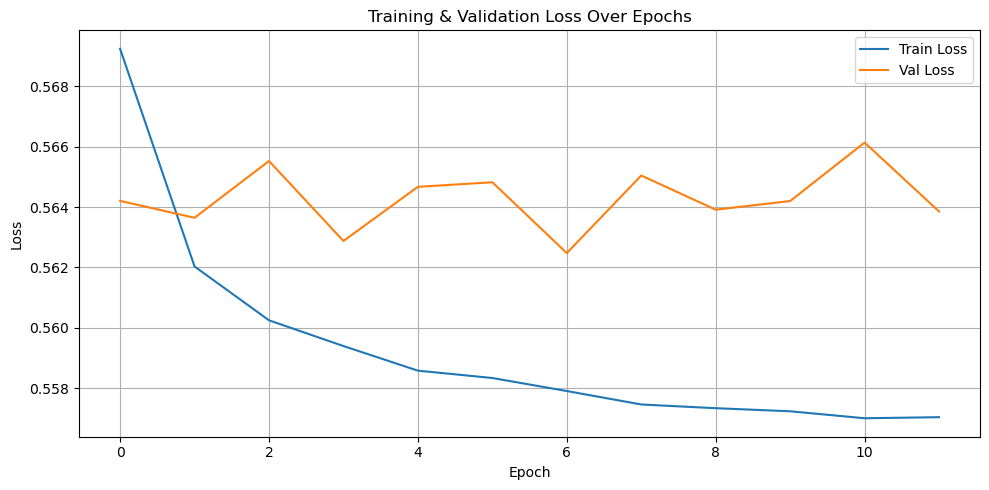

[2025-07-29 07:54:21] [INFO]: Encoding features and preparing data...
[2025-07-29 07:54:21] [INFO]: Found cached files for parameters: t_outcome_w0_th0.5_mra8_numcase:AMOUNT_REQ_catnone. Loading X and y.
[2025-07-29 07:54:21] [DEBUG]: Activity dim: 24, Attr dim: 1, Num articles: 0, Embedding dim: 0


Evaluating for window: 0, target: outcome, n_gram: 1, architecture: cnn
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 activity_input (InputLayer  [(None, 24)]                 0         []                            
 )                                                                                                
                                                                                                  
 attributes_input (InputLay  [(None, 1)]                  0         []                            
 er)                                                                                              
                                                                                                  
 concatenate (Concatenate)   (None, 25)                   0         ['activity_input[0][0]',      
                      

[2025-07-29 07:57:19] [INFO]: [remaining_time_bpi_2012_cnn] Classification Report:
              precision    recall  f1-score   support

           0     0.6068    0.4730    0.5316     15608
           1     0.7728    0.8539    0.8113     32755

    accuracy                         0.7310     48363
   macro avg     0.6898    0.6635    0.6715     48363
weighted avg     0.7192    0.7310    0.7211     48363

[2025-07-29 07:57:19] [INFO]: [remaining_time_bpi_2012_cnn] Accuracy: 0.7310, F1 Score: 0.7211
[2025-07-29 07:57:19] [INFO]: Evaluation for remaining_time_bpi_2012_cnn: MAE: 0.7310, MSE: 0.7211, R²: 0.0000


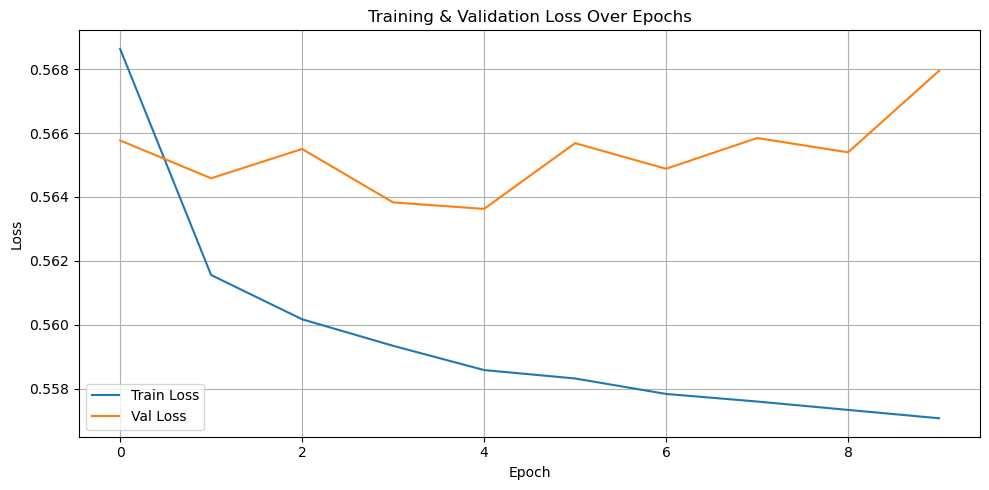

[2025-07-29 07:57:20] [INFO]: Encoding features and preparing data...
[2025-07-29 07:57:20] [INFO]: Found cached files for parameters: t_outcome_w0_th0.5_mra8_numcase:AMOUNT_REQ_catnone. Loading X and y.
[2025-07-29 07:57:20] [DEBUG]: Activity dim: 24, Attr dim: 1, Num articles: 0, Embedding dim: 0


Evaluating for window: 0, target: outcome, n_gram: 1, architecture: cnn
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 activity_input (InputLayer  [(None, 24)]                 0         []                            
 )                                                                                                
                                                                                                  
 attributes_input (InputLay  [(None, 1)]                  0         []                            
 er)                                                                                              
                                                                                                  
 concatenate (Concatenate)   (None, 25)                   0         ['activity_input[0][0]',      
                      

[2025-07-29 07:59:29] [INFO]: [remaining_time_bpi_2012_cnn] Classification Report:
              precision    recall  f1-score   support

           0     0.6102    0.4440    0.5140     15608
           1     0.7655    0.8648    0.8121     32755

    accuracy                         0.7290     48363
   macro avg     0.6878    0.6544    0.6631     48363
weighted avg     0.7154    0.7290    0.7159     48363

[2025-07-29 07:59:29] [INFO]: [remaining_time_bpi_2012_cnn] Accuracy: 0.7290, F1 Score: 0.7159
[2025-07-29 07:59:29] [INFO]: Evaluation for remaining_time_bpi_2012_cnn: MAE: 0.7290, MSE: 0.7159, R²: 0.0000


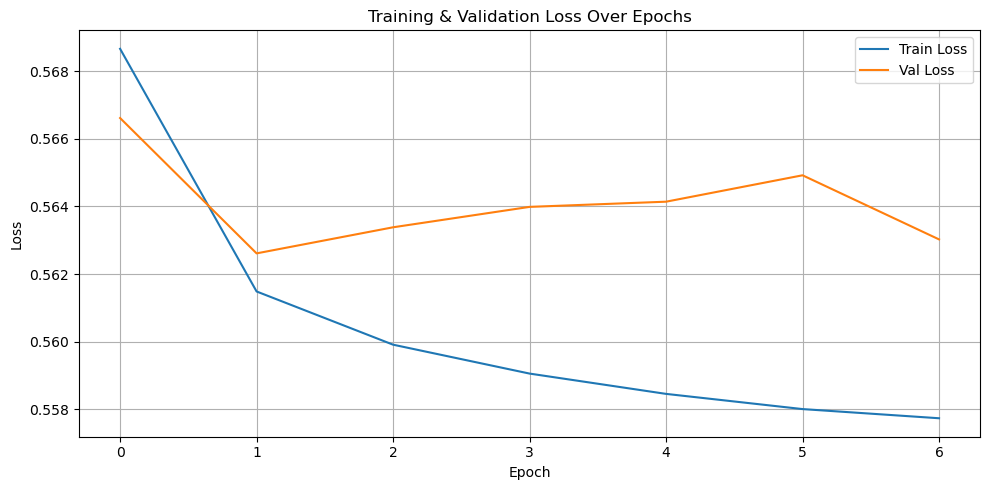

[2025-07-29 07:59:30] [INFO]: Encoding features and preparing data...
[2025-07-29 07:59:30] [INFO]: Found cached files for parameters: t_outcome_w0_th0.5_mra8_numcase:AMOUNT_REQ_catnone. Loading X and y.
[2025-07-29 07:59:30] [DEBUG]: Activity dim: 24, Attr dim: 1, Num articles: 0, Embedding dim: 0


Evaluating for window: 0, target: outcome, n_gram: 1, architecture: cnn
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 activity_input (InputLayer  [(None, 24)]                 0         []                            
 )                                                                                                
                                                                                                  
 attributes_input (InputLay  [(None, 1)]                  0         []                            
 er)                                                                                              
                                                                                                  
 concatenate (Concatenate)   (None, 25)                   0         ['activity_input[0][0]',      
                      

[2025-07-29 08:02:13] [INFO]: [remaining_time_bpi_2012_cnn] Classification Report:
              precision    recall  f1-score   support

           0     0.5936    0.4909    0.5374     15608
           1     0.7759    0.8398    0.8066     32755

    accuracy                         0.7272     48363
   macro avg     0.6847    0.6654    0.6720     48363
weighted avg     0.7171    0.7272    0.7197     48363

[2025-07-29 08:02:13] [INFO]: [remaining_time_bpi_2012_cnn] Accuracy: 0.7272, F1 Score: 0.7197
[2025-07-29 08:02:13] [INFO]: Evaluation for remaining_time_bpi_2012_cnn: MAE: 0.7272, MSE: 0.7197, R²: 0.0000


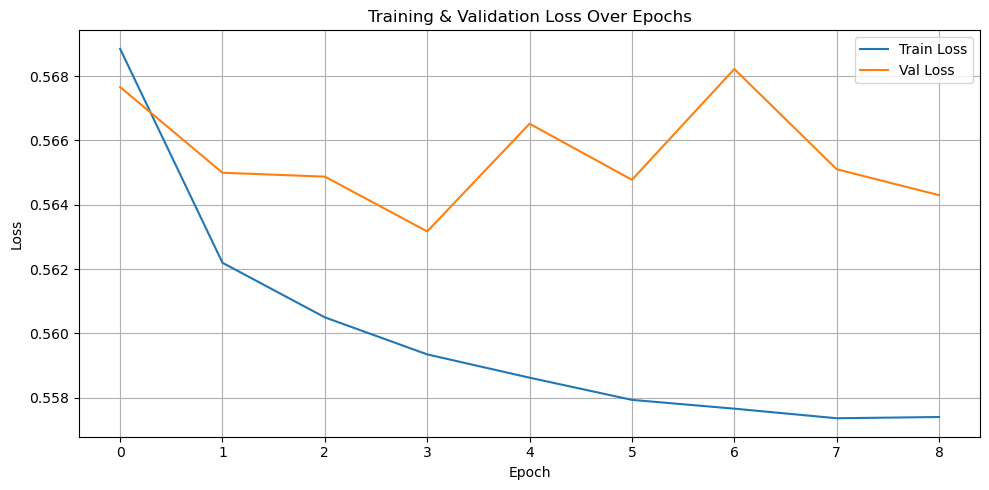


 Summary (mean ± std):
time_window = 0.0: MAE = 0.7299 ± 0.0041 MSE = 0.7175 ± 0.0028, R2 = 0.0000 ± 0.0000
time_window = 1.0: MAE = 0.7314 ± 0.0050 MSE = 0.7193 ± 0.0028, R2 = 0.0000 ± 0.0000


In [2]:
update_repository()
# evaluate for various hyperparameters
from evaluate import evaluate_cnn_prediction_model
import gc
from tensorflow.keras import backend as K

folder_name = "simulated_loan_application"
folder_name = "bpi_2017"
folder_name = "bpi_2012"

# build paths
log_file = f"{folder_name}.xes"
text_dir = os.path.join("data", "labeled", folder_name)
log_dir = os.path.join("data", "raw_logs")

# build event_df
log_df = pm4py.read_xes(os.path.join(log_dir, log_file))
log_df = convert_to_datetime(log_df, "time:timestamp")
print(log_df.columns)

# set hyperparameters
architecture = "xgboost"
architecture = "mlp"
architecture = "cnn"
hidden_units=[4096, 2048, 1024, 512, 256, 128, 64, 32, 16]
hidden_units=[128, 64, 32, 16]
hidden_units_news=[128]
learning_rates = 0.0005
cnn_layers=[(256, 1),(128, 3)]
pooling_layers=[1,2]
patience = 5
cat_attributes = []
num_attributes = []
max_recent_articles = 8
time_windows = [1, 0]
n_gram = 1
k = 5
target = "remaining_time_state"
target = "outcome"

# set parameters simulated_loan_application
if folder_name == "simulated_loan_application":
    text_file = "labeled_cnn_outcome_class_simulated_loan_application_w1__gtr-t5-xl_text_abstract_[2048, 1024, 512, 256, 128, 64, 32, 16]_[64, 128]_[7, 5].csv"
    threshold = 0.72

# set parameters bpi_2012
if folder_name == "bpi_2012":
    if target == "outcome_class":
        text_file = f"labeled_cnn_outcome_class_bpi_2012_w1__gtr-t5-xl_text_combined_text_[2048, 1024, 512, 256, 128, 64, 32, 16]_[64, 128]_[7, 5].csv"
        threshold = 0.3801
    else:
        text_file = f"labeled_cnn_remaining_time_class_bpi_2012_w1__gtr-t5-xl_text_combined_text_[2048, 1024, 512, 256, 128, 64, 32, 16]_[64, 128]_[7, 5].csv"
        threshold = 0.5
    num_attributes = ["case:AMOUNT_REQ"]
    #log_df = log_df[log_df["concept:name"].str.startswith('A_')]

# set parameters bpi_2017
if folder_name == "bpi_2017":
    if target == "outcome_class":
        text_file = "labeled_cnn_outcome_class_bpi_2017_w1__gtr-t5-xl_text_combined_text_[2048, 1024, 512, 256, 128, 64, 32, 16]_[64, 128]_[7, 5].csv"
        threshold = 0.4243
    else:
        text_file = "labeled_cnn_remaining_time_class_bpi_2017_w1__gtr-t5-xl_text_combined_text_[2048, 1024, 512, 256, 128, 64, 32, 16]_[64, 128]_[7, 5].csv"
        threshold = 0.5048
    num_attributes = ["case:RequestedAmount"]
    cat_attributes = ["case:LoanGoal"]
    cnn_layers=[(256, 1),(128, 3)]
    pooling_layers=[1,2]
    hidden_units=[256, 128, 64, 32, 16]
    hidden_units=[1024, 512, 256, 128, 64, 32, 16]
    hidden_units_news=[128, 32]
    max_recent_articles = 4
    batch_size = 8
    reduced = True
    if reduced:
        n = 5
        case_id_col = "case:concept:name"
        every_nth_case_ids = log_df[case_id_col].drop_duplicates().iloc[::n]
        log_df = log_df[log_df[case_id_col].isin(every_nth_case_ids)]

# build text_df
text_df = pd.read_csv(os.path.join(text_dir, text_file))
text_df = convert_to_datetime(text_df, "pub_date")

results = []
for time_window in time_windows:
    for _ in range(k):
        print(f"Evaluating for window: {time_window}, target: {target}, n_gram: {n_gram}, architecture: {architecture}")
        mae, mse, r2 = evaluate_cnn_prediction_model(
            folder_name=folder_name,
            text_df=text_df,
            log_df=log_df,
            time_window=time_window,  # in days
            threshold=threshold,
            cat_attributes=cat_attributes,
            num_attributes=num_attributes,
            max_recent_articles=max_recent_articles,
            hidden_units=hidden_units,
            hidden_units_news=hidden_units_news,
            cnn_layers=cnn_layers,
            pooling_layers=pooling_layers,
            learning_rate=learning_rates, 
            patience=patience,
            target=target,
        )
        results.append(
            {
                "time_window": time_window,
                "mae": mae,
                "mse": mse,
                "r2": r2,
            }
        )
        gc.collect()
        K.clear_session()

results_df = pd.DataFrame(results)

print("\n Summary (mean ± std):")
summary = (
    results_df.groupby("time_window")
    .agg(
        mae_mean=("mae", "mean"),
        mae_std=("mae", "std"),
        mse_mean=("mse", "mean"),
        mse_std=("mse", "std"),
        r2_mean=("r2", "mean"),
        r2_std=("r2", "std"),
    )
    .reset_index()
)

for _, row in summary.iterrows():
    print(
        f"time_window = {row['time_window']}: "
        f"MAE = {row['mae_mean']:.4f} ± {row['mae_std']:.4f} "
        f"MSE = {row['mse_mean']:.4f} ± {row['mse_std']:.4f}, "
        f"R2 = {row['r2_mean']:.4f} ± {row['r2_std']:.4f}"
    )

# Enhanced CNN Hyperparameter Search

In [ ]:
update_repository()
# evaluate for various hyperparameters
from evaluate import evaluate_cnn_prediction_model

folder_name = "bpi_2012"
folder_name = "bpi_2017"
log_file = f"{folder_name}.xes"
target = "remaining_time_state"
study_name = f"{target}_trial_1"

# build paths
text_dir = os.path.join("data", "labeled", folder_name)
log_dir = os.path.join("data", "raw_logs")
optuna_path = os.path.join("data", "optuna", folder_name, f"{study_name}.db")
os.makedirs(os.path.dirname(optuna_path), exist_ok=True)
results_path = os.path.join("data", "results", folder_name, f"{study_name}.csv")
os.makedirs(os.path.dirname(results_path), exist_ok=True)

if folder_name == "bpi_2012":
    text_file = f"labeled_cnn_remaining_time_class_bpi_2012_w1__gtr-t5-xl_text_combined_text_[2048, 1024, 512, 256, 128, 64, 32, 16]_[64, 128]_[7, 5].csv"
    num_attributes = ["case:AMOUNT_REQ"]
    cat_attributes = []
    threshold = 0.5

# set parameters bpi_2017
if folder_name == "bpi_2017":
    text_file = "labeled_cnn_remaining_time_class_bpi_2017_w1__gtr-t5-xl_text_combined_text_[2048, 1024, 512, 256, 128, 64, 32, 16]_[64, 128]_[7, 5].csv"
    threshold = 0.5048
    reduced = True

# set hyperparameters
learning_rates = 0.0005
patience = 5
time_window = 1

# build text_df
text_df = pd.read_csv(os.path.join(text_dir, text_file))
text_df = convert_to_datetime(text_df, "pub_date")

# build event_df
log_df = pm4py.read_xes(os.path.join(log_dir, log_file))
log_df = convert_to_datetime(log_df, "time:timestamp")

if reduced:
    n = 5
    case_id_col = "case:concept:name"
    every_nth_case_ids = log_df[case_id_col].drop_duplicates().iloc[::n]
    log_df = log_df[log_df[case_id_col].isin(every_nth_case_ids)]

# trial hyperparameter ranges
ALL_HIDDEN_UNITS = [4096, 2048, 1024, 512, 256, 128, 64, 32, 16]
ALL_HIDDEN_UNITS_NEWS = [128, 32, 8, 4, 1]
ALL_CNN_LAYERS = [(256, 1), (128, 3), (64, 3), (32, 3), (16, 3)]
ALL_POOLING_LAYERS = [1, 2, 2, 2, 2]

def is_valid_cnn_pool_config(max_articles, pooling_layers):
    """
    Ensures that the final feature map size after pooling is at least 1
    """
    pooled = max_articles
    for p in pooling_layers:
        pooled = math.floor(pooled / p)
        if pooled < 1:
            return False
    return True

def append_trial_result(results_path, trial_data, header):
    file_exists = os.path.isfile(results_path)
    with open(results_path, mode="a", newline="") as f:
        writer = csv.DictWriter(f, fieldnames=header)
        if not file_exists:
            writer.writeheader()
        writer.writerow(trial_data)

def objective(trial):
    # Sample hyperparameters
    hidden_units_count = trial.suggest_int("hidden_units_count", 4, len(ALL_HIDDEN_UNITS))
    hidden_units = ALL_HIDDEN_UNITS[-hidden_units_count:]  # Rightmost layers

    hidden_units_news_count = trial.suggest_int("hidden_units_news_count", 1, len(ALL_HIDDEN_UNITS_NEWS))
    hidden_units_news = ALL_HIDDEN_UNITS_NEWS[:hidden_units_news_count]  # Leftmost layers

    max_recent_power = trial.suggest_int("max_recent_power", 0, 4)
    max_recent_articles = 2 ** max_recent_power

    cnn_layer_count = trial.suggest_int("cnn_layer_count", 1, len(ALL_CNN_LAYERS))
    cnn_layers = ALL_CNN_LAYERS[:cnn_layer_count]
    pooling_layers = ALL_POOLING_LAYERS[:cnn_layer_count]

    log.info(f"Trial hyperparameters: hidden_units={hidden_units}, hidden_units_news={hidden_units_news}, "
          f"max_recent_articles={max_recent_articles}, cnn_layers={cnn_layers}, pooling_layers={pooling_layers}")

    if not is_valid_cnn_pool_config(max_recent_articles, pooling_layers):
        raise optuna.exceptions.TrialPruned()

    try:
        mae, mse, r2 = evaluate_remaining_time_model(
            folder_name=folder_name,
            text_df=text_df,
            log_df=log_df,
            time_window=time_window,
            threshold=threshold,
            cat_attributes=cat_attributes,
            num_attributes=num_attributes,
            max_recent_articles=max_recent_articles,
            hidden_units=hidden_units,
            hidden_units_news=hidden_units_news,
            cnn_layers=cnn_layers,
            pooling_layers=pooling_layers,
            learning_rate=learning_rates,
            patience=patience,
        )
        log.info(f"Trial completed with MAE: {mae}")

        trial_result = {
            "hidden_units": hidden_units,
            "hidden_units_news": hidden_units_news,
            "max_recent_articles": max_recent_articles,
            "cnn_layers": cnn_layers,
            "pooling_layers": pooling_layers,
            "learning_rate": learning_rates,
            "mae": mae,
            "mse": mse,
            "r2": r2
        }

        csv_header = list(trial_result.keys())
        append_trial_result(results_path, trial_result, csv_header)

        return mae


    except Exception as e:
        log.warning(f"Trial failed due to: {e}")
        raise optuna.exceptions.TrialPruned()

    finally:
        import gc
        from tensorflow.keras import backend as K
        gc.collect()
        K.clear_session()

# Run optimization
study = optuna.create_study(
    study_name=study_name,
    direction="minimize",
    storage=f"sqlite:///{optuna_path}",  # Just a file on disk
    load_if_exists=True,
)
study.optimize(objective, n_trials=100)  # adjust n_trials/timeout as needed

# Output best result
log.info("Best trial:")
log.info(f"  MAE: {study.best_value}")
log.info(f"  Params: {study.best_params}")

Updating the git repository...
Already up to date.



parsing log, completed traces ::   0%|          | 0/31509 [00:00<?, ?it/s]

[I 2025-06-11 15:34:39,670] A new study created in RDB with name: remaining_time_state_trial_1
[2025-06-11 15:34:39] [INFO]: Trial hyperparameters: hidden_units=[256, 128, 64, 32, 16], hidden_units_news=[128, 32], max_recent_articles=4, cnn_layers=[(256, 1), (128, 3), (64, 3), (32, 3)], pooling_layers=[1, 2, 2, 2]
[I 2025-06-11 15:34:39,769] Trial 0 pruned. 
[2025-06-11 15:34:39] [INFO]: Trial hyperparameters: hidden_units=[512, 256, 128, 64, 32, 16], hidden_units_news=[128, 32, 8], max_recent_articles=4, cnn_layers=[(256, 1), (128, 3), (64, 3), (32, 3)], pooling_layers=[1, 2, 2, 2]
[I 2025-06-11 15:34:39,865] Trial 1 pruned. 
[2025-06-11 15:34:39] [INFO]: Trial hyperparameters: hidden_units=[512, 256, 128, 64, 32, 16], hidden_units_news=[128], max_recent_articles=4, cnn_layers=[(256, 1), (128, 3)], pooling_layers=[1, 2]
[2025-06-11 15:34:39] [INFO]: Encoding features and preparing data...
[2025-06-11 15:34:39] [INFO]: Found cached files for parameters: tw1_th0.5048_mra4_numnone_catnon

Epoch 1/250


/opt/conda/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['attributes_input'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


5127/5127 [==============================] - 33s 6ms/step - loss: 8.6792 - mae: 8.6792 - val_loss: 8.5448 - val_mae: 8.5448
Epoch 2/250
5127/5127 [==============================] - 31s 6ms/step - loss: 8.5012 - mae: 8.5012 - val_loss: 8.4114 - val_mae: 8.4114
Epoch 3/250
4583/5127 [=========================>....] - ETA: 3s - loss: 8.4374 - mae: 8.4374

# Fetch Articles

In [5]:
update_repository()
from nyt_processing import NYTArticleFetcher, add_combined_text_column

log = "bpi_2017"
log = "bpi_2012"

log_file = f"{folder_name}.xes"
text_file = f"nyt_{folder_name}.csv"
output_path = os.path.join("data", "raw_nyt_data", text_file)

fields = {
    "headline": "Headline",
    #"section_name": "Section",
    "keywords": "Keywords",
    "snippet": "Snippet"
}

article_fetcher = NYTArticleFetcher()
df = article_fetcher.fetch_articles_for_log(
    log_file
)

# filter accordingly
#section_names = get_section_names(log)
#df = filter_section_names(df, section_names, "section_name")

df = add_combined_text_column(df, fields)
df.to_csv(output_path, index=False)  



Updating the git repository...


[2025-07-11 08:17:41] [INFO]: Loading data/raw_logs/bpi_2012.xes...


Already up to date.



parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

[2025-07-11 08:17:51] [INFO]: Fetching NYT articles from 2011-09-17 00:38:44.546000+00:00 to 2012-03-14 16:04:54.681000+00:00...
[2025-07-11 08:17:51] [INFO]: Fetching NYT archive for 2011-09...
[2025-07-11 08:17:53] [INFO]: Retrieved 9200 articles.
[2025-07-11 08:18:05] [INFO]: Fetching NYT archive for 2011-10...
[2025-07-11 08:18:08] [INFO]: Retrieved 8912 articles.
[2025-07-11 08:18:20] [INFO]: Fetching NYT archive for 2011-11...
[2025-07-11 08:18:22] [INFO]: Retrieved 8722 articles.
[2025-07-11 08:18:34] [INFO]: Fetching NYT archive for 2011-12...
[2025-07-11 08:18:36] [INFO]: Retrieved 8504 articles.
[2025-07-11 08:18:48] [INFO]: Fetching NYT archive for 2012-01...
[2025-07-11 08:18:51] [INFO]: Retrieved 9168 articles.
[2025-07-11 08:19:03] [INFO]: Fetching NYT archive for 2012-02...
[2025-07-11 08:19:06] [INFO]: Retrieved 8796 articles.
[2025-07-11 08:19:18] [INFO]: Fetching NYT archive for 2012-03...
[2025-07-11 08:19:20] [INFO]: Retrieved 9280 articles.
[2025-07-11 08:19:33] [I

# Clustering

In [ ]:
folder_name = "bpi_2012"
text_column = "text_combined_text"

features_path = os.path.join(
    "data", "training", folder_name, "features_df.pkl"
)

df = pd.read_pickle(features_path)
embedding_2d, labels, label_classes = reduce_vectors_to_2d(df, text_column=text_column)
embedding_2d, sent_scores = reduce_vectors_to_2d_filtered_by_section(
    df, section="economics"
)

plot_2d_embeddings(
    embedding_2d, labels, label_classes, folder_name
)

plot_2d_embeddings_shaded(embedding_2d, sent_scores, "simulated_loan_application")

embedding_2d, sent_scores = reduce_vectors_to_2d_filtered_by_section(
    df, section="economics"
)

# Plot traces over time

In [12]:
folder_name = "bpi_2017"
folder_name = "bpi_2012"

parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

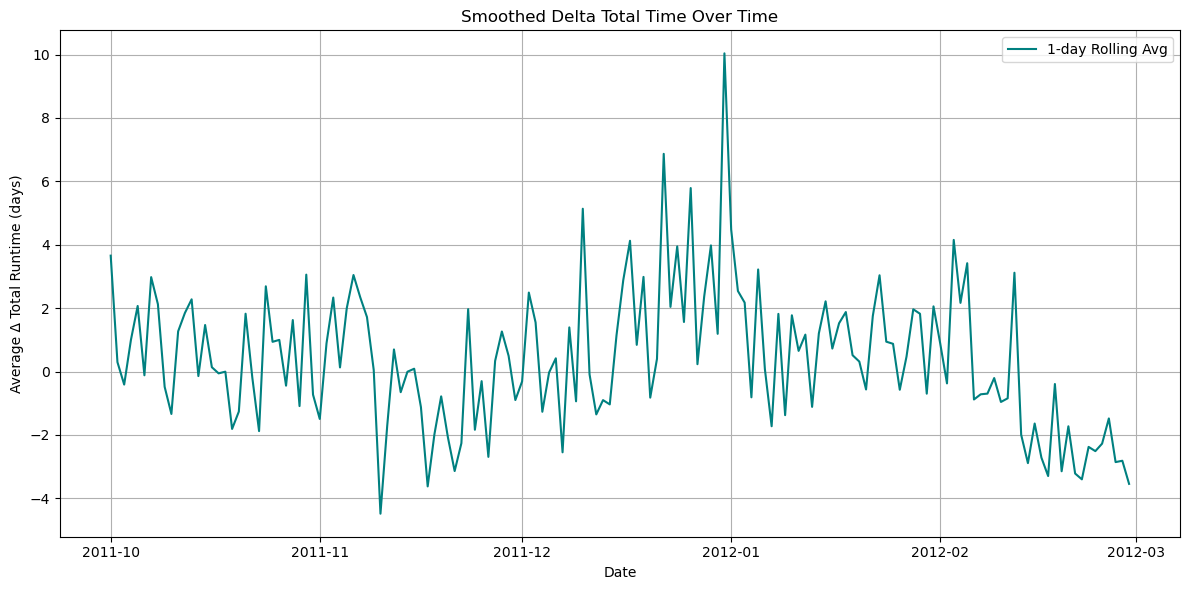

[2025-07-11 09:23:35] [INFO]: Outcome DataFrame shape: (13087, 3)
[2025-07-11 09:23:35] [INFO]: Daily counts:
status      Successful  Unsuccessful
start_date                          
2011-10-01          12            31
2011-10-02           6            44
2011-10-03          20            87
2011-10-04          21            62
2011-10-05          37            89
2011-10-06          14            65
2011-10-07          21            73
2011-10-08           9            32
2011-10-09          10            57
2011-10-10          13            68
2011-10-11          12            62
2011-10-12          17            76
2011-10-13          16            60
2011-10-14          19            58
2011-10-15          11            32
2011-10-16          10            30
2011-10-17          19            84
2011-10-18          19            87
2011-10-19          18           116
2011-10-20          21            66
2011-10-21          21            54
2011-10-22          11            44
20

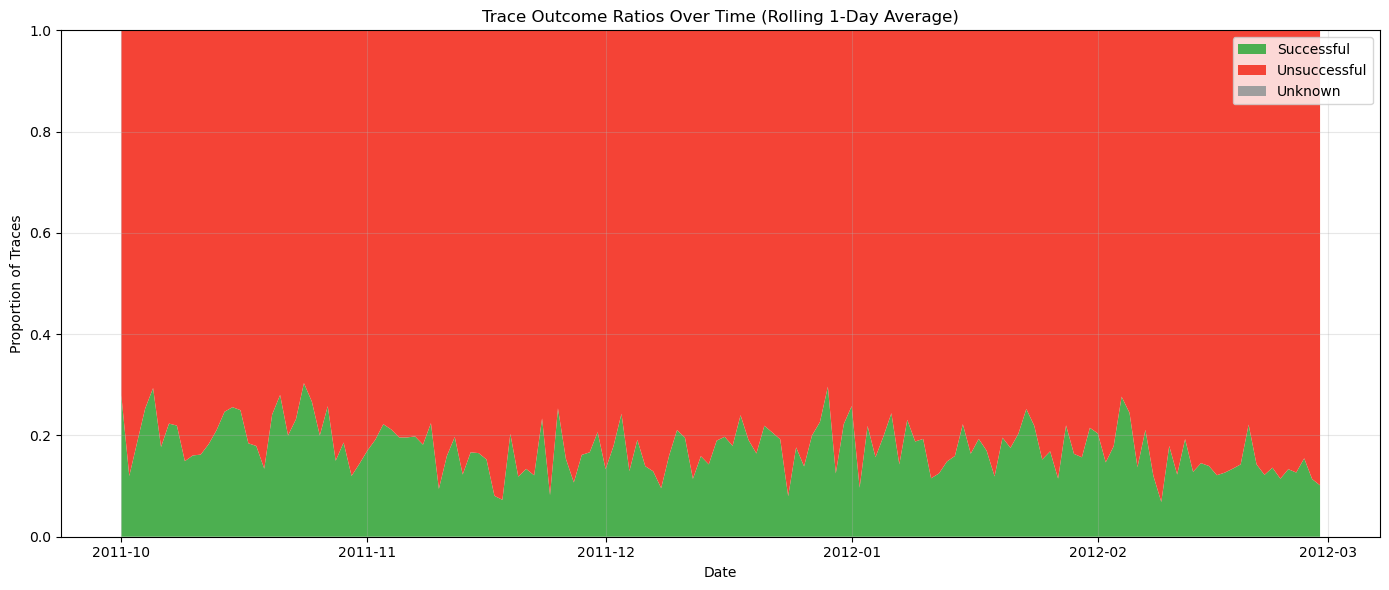

In [16]:
import os

df = pm4py.read_xes(f"./data/raw_logs/{folder_name}.xes")
aggregated_path = f"./data/processed_logs/{folder_name}_time_delta.csv"
if not os.path.exists(aggregated_path):
    process_event_log(f"{folder_name}.xes")
df_aggregated = pd.read_csv(aggregated_path)
plot_delta_total_time_over_time(df_aggregated, window_size=1)
df = build_outcome_df(df, success_events=["O_ACCEPTED"])
plot_success_ratio_over_time(df, folder_name, window_size=1)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pm4py.objects.log.importer.xes import importer as xes_importer

file_name = "bpi_2013.xes"
# Load the event log
log_path = f"data/raw_logs/{file_name}"
log = xes_importer.apply(log_path)

# Extract the start time of each case (trace)
case_starts = [trace[0]['time:timestamp'] for trace in log if trace]

# Create DataFrame
df = pd.DataFrame(case_starts, columns=['start_time'])

# Extract just the date
df['start_date'] = df['start_time'].dt.date

# Group by date and count
daily_case_counts = df.groupby('start_date').size()

# Plotting
plt.figure(figsize=(12, 6))
daily_case_counts.plot(marker='o')
plt.title("Number of Cases Started per Day")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

df = process_event_log(file_name)
print(df.head())
plot_delta_total_time_over_time(df, window_size=1)


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# Load event log
log = xes_importer.apply("data/raw_logs/bpi_2013.xes")

# Discover the directly-follows graph (DFG)
dfg = dfg_discovery.apply(log)

# Create a directed graph with edge weights from DFG
G = nx.DiGraph()

# Add edges with frequencies
# Sort by frequency for better readability
sorted_dfg = sorted(dfg.items(), key=lambda x: x[1], reverse=True)

# Print as ASCII arrows
print("Directly-Follows Graph (ASCII view):\n")
for (src, tgt), freq in sorted_dfg:
    print(f"{src} -> {tgt}  (freq: {freq})")

for (src, tgt), freq in dfg.items():
    G.add_edge(src, tgt, weight=freq)

# Draw graph with edge labels
pos = nx.spring_layout(G, seed=42)  # For consistent layout
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1500)
nx.draw_networkx_edges(G, pos, arrowsize=20, arrowstyle='-|>')
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("Directly-Follows Graph (DFG) from Event Log")
plt.axis('off')
plt.show()


# Log Analysis

In [27]:
folder_name = "bpi_2012"
folder_name = "bpi_2017"

log_file = f"{folder_name}.xes"
log_df = pm4py.read_xes(os.path.join(log_dir, log_file))
log_df = convert_to_datetime(log_df, "time:timestamp")


pd.set_option('display.max_rows', None)
print(f"Columns: {log_df.columns.tolist()}")
activities = log_df['concept:name'].unique()
print(f"Activities: {sorted(activities)}")
print(f"Number of unique activities: {len(activities)}")
print(f"Cases: {len(log_df['case:concept:name'].unique())}")
print(f"Total number of events: {len(log_df)}")
print(f"Average number of events per case: {log_df.groupby('case:concept:name').size().mean()}")
print(f"Average event duration: {log_df['time:timestamp'].diff().mean()}")


log_df = log_df[["case:concept:name", "concept:name", "time:timestamp"]]
log_df_sorted = log_df.sort_values(by=['case:concept:name', "time:timestamp"])
print("Event log head:")
print(log_df_sorted.head(100))

parsing log, completed traces ::   0%|          | 0/31509 [00:00<?, ?it/s]

Columns: ['Action', 'org:resource', 'concept:name', 'EventOrigin', 'EventID', 'lifecycle:transition', 'time:timestamp', 'case:LoanGoal', 'case:ApplicationType', 'case:concept:name', 'case:RequestedAmount', 'FirstWithdrawalAmount', 'NumberOfTerms', 'Accepted', 'MonthlyCost', 'Selected', 'CreditScore', 'OfferedAmount', 'OfferID']
Activities: ['A_Accepted', 'A_Cancelled', 'A_Complete', 'A_Concept', 'A_Create Application', 'A_Denied', 'A_Incomplete', 'A_Pending', 'A_Submitted', 'A_Validating', 'O_Accepted', 'O_Cancelled', 'O_Create Offer', 'O_Created', 'O_Refused', 'O_Returned', 'O_Sent (mail and online)', 'O_Sent (online only)', 'W_Assess potential fraud', 'W_Call after offers', 'W_Call incomplete files', 'W_Complete application', 'W_Handle leads', 'W_Personal Loan collection', 'W_Shortened completion ', 'W_Validate application']
Number of unique activities: 26
Cases: 31509
Total number of events: 1202267
Average number of events per case: 38.15630454790695
Average event duration: 0 days 

In [29]:
# Ensure all activity names are lowercase for consistent comparison
log_df_sorted["concept:name"] = log_df_sorted["concept:name"].str.lower()

# Group events by case (as lowercase sets)
grouped = log_df_sorted.groupby("case:concept:name")["concept:name"].apply(set)

# Count traces matching each condition
neither_count = (grouped.apply(lambda x: "a_accepted" not in x and "o_accepted" not in x)).sum()
only_a_count = (grouped.apply(lambda x: "a_accepted" in x and "o_accepted" not in x)).sum()
only_o_count = (grouped.apply(lambda x: "a_accepted" not in x and "o_accepted" in x)).sum()
both_count = (grouped.apply(lambda x: "a_accepted" in x and "o_accepted" in x)).sum()

# Print results
print("Traces containing neither A_ACCEPTED nor O_ACCEPTED:", neither_count)
print("Traces containing only A_ACCEPTED:", only_a_count)
print("Traces containing only O_ACCEPTED:", only_o_count)
print("Traces containing both A_ACCEPTED and O_ACCEPTED:", both_count)


Traces containing neither A_ACCEPTED nor O_ACCEPTED: 0
Traces containing only A_ACCEPTED: 14281
Traces containing only O_ACCEPTED: 0
Traces containing both A_ACCEPTED and O_ACCEPTED: 17228


# Sentiment Analysis

### Initialisation

In [2]:
update_repository()
import os

base_folder_name = "bpi_2012"
folder_name = base_folder_name + "_enriched"

log_file = f"{base_folder_name}.xes"
enriched_log_file = f"{folder_name}.xes"
text_file = f"nyt_{base_folder_name}_sent.csv"
text_output_path = os.path.join("data", "raw_nyt_data", text_file)
log_input_path = os.path.join("data", "raw_logs", log_file)
log_output_path = os.path.join("data", "raw_logs", f"{folder_name}.xes")


Updating the git repository...
Already up to date.



### Fetch Articles

In [ ]:
import pm4py

from nyt_processing import NYTArticleFetcher, get_keywords, filter_keywords
from log_processing import convert_to_datetime

article_fetcher = NYTArticleFetcher()
text_df = article_fetcher.fetch_articles_for_log(log_file)
# filter "relevant" articles
keywords = get_keywords("finance")
text_df = filter_keywords(text_df, keywords, ["headline", "snippet"])
text_df = convert_to_datetime(text_df, "pub_date")

text_df.to_csv(text_output_path, index=False)  

[2025-06-24 10:30:23] [INFO]: Loading data/raw_logs/bpi_2012.xes...


parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

[2025-06-24 10:30:35] [INFO]: Fetching NYT articles from 2011-09-17 00:38:44.546000+00:00 to 2012-03-14 16:04:54.681000+00:00...
[2025-06-24 10:30:35] [INFO]: Fetching NYT archive for 2011-09...
[2025-06-24 10:30:38] [INFO]: Retrieved 9200 articles.
[2025-06-24 10:30:50] [INFO]: Fetching NYT archive for 2011-10...
[2025-06-24 10:30:52] [INFO]: Retrieved 8912 articles.
[2025-06-24 10:31:04] [INFO]: Fetching NYT archive for 2011-11...
[2025-06-24 10:31:07] [INFO]: Retrieved 8722 articles.
[2025-06-24 10:31:19] [INFO]: Fetching NYT archive for 2011-12...
[2025-06-24 10:31:21] [INFO]: Retrieved 8504 articles.
[2025-06-24 10:31:33] [INFO]: Fetching NYT archive for 2012-01...
[2025-06-24 10:31:36] [INFO]: Retrieved 9168 articles.
[2025-06-24 10:31:48] [INFO]: Fetching NYT archive for 2012-02...
[2025-06-24 10:31:51] [INFO]: Retrieved 8796 articles.
[2025-06-24 10:32:03] [INFO]: Fetching NYT archive for 2012-03...
[2025-06-24 10:32:05] [INFO]: Retrieved 9280 articles.
[2025-06-24 10:32:18] [I

### Sentiment Analysis

In [ ]:
from sentiment_analysis import SentimentAnalyzer

text_df = pd.read_csv(text_output_path)

sentiment_analyzer = SentimentAnalyzer(model="ProsusAI/finbert")
text_df = sentiment_analyzer.add_sentiment_columns(text_df, text_column="headline")
text_df = sentiment_analyzer.add_sentiment_columns(text_df, text_column="snippet")

text_df.to_csv(text_output_path, index=False)  

[2025-06-24 10:32:29] [INFO]: Initializing SentimentAnalyzer...
[2025-06-24 10:32:29] [INFO]: Loading sentiment analysis model and tokenizer...


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

[2025-06-24 10:32:39] [INFO]: SentimentAnalyzer initialized successfully.
[2025-06-24 10:32:39] [INFO]: Applying sentiment analysis on column 'headline'...
Calculating Sentiment Scores:   0%|          | 2/4046 [00:00<12:40,  5.32it/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Calculating Sentiment Scores: 100%|██████████| 4046/4046 [00:25<00:00, 155.99it/s]
[2025-06-24 10:33:05] [INFO]: Sentiment columns for 'headline' added: headline_pos, headline_neu, headline_neg
[2025-06-24 10:33:05] [INFO]: Applying sentiment analysis on column 'snippet'...
Calculating Sentiment Scores: 100%|██████████| 4046/4046 [00:26<00:00, 154.42it/s]
[2025-06-24 10:33:31] [INFO]: Sentiment columns for 'snippet' added: snippet_pos, snippet_neu, snippet_neg


### Enrichment

In [4]:
import pandas as pd
from log_processing import convert_to_datetime

text_df = pd.read_csv(text_output_path)
text_df = convert_to_datetime(text_df, "pub_date")

text_columns = ["headline", "snippet"]
sentiment_degrees = ["pos", "neg", "neu"]
sentiment_columns = [
    f"{text}_{sentiment}"
    for text in text_columns
    for sentiment in sentiment_degrees
]

log_df = pm4py.read_xes(log_input_path)
log_df = convert_to_datetime(log_df, "time:timestamp")

enriched_log = enrich_events(log_df, text_df, mode="window", window_size=pd.Timedelta(days=1), sentiment_columns=sentiment_columns)
pm4py.write_xes(enriched_log, log_output_path, case_id_key='case:concept:name')

/opt/conda/lib/python3.10/site-packages/pm4py/util/dt_parsing/parser.py:82: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

Enriching events...: 100%|██████████| 13087/13087 [03:24<00:00, 63.93it/s] 
[2025-07-04 09:53:16] [INFO]: Total events processed: 262200
[2025-07-04 09:53:16] [INFO]: Events with empty external text: 0
[2025-07-04 09:53:16] [INFO]: Events with no sentiment data: 0


exporting log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

### Evaluation

Updating the git repository...
Already up to date.



parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

[2025-07-07 08:01:28] [INFO]: Events: 262200
[2025-07-07 08:01:28] [INFO]: Cases: 13087
[2025-07-07 08:01:28] [INFO]: Activities: 24
[2025-07-07 08:01:28] [INFO]: Resources: 68
[2025-07-07 08:01:28] [INFO]: Start: 2011-10-01 00:38:44.546000, End: 2012-03-14 16:04:54.681000


num_attributes: ['case:AMOUNT_REQ'], learning_rate: 0.0005, n_gram: 1, time_window: 0


[2025-07-07 08:01:28] [INFO]: Events/case avg: 20.04, max: 175, min: 3
[2025-07-07 08:01:29] [INFO]: Missing values: org:resource=18010
[2025-07-07 08:01:30] [INFO]: Cases with disordered timestamps: 0
[2025-07-07 08:01:30] [INFO]: Preparing data...
Processing cases: 100%|██████████| 13087/13087 [02:23<00:00, 91.41it/s] 
[2025-07-07 08:03:54] [DEBUG]: Final feature shape: (249113, 25)
[2025-07-07 08:03:54] [DEBUG]: Final label shape: (249113,)
[2025-07-07 08:03:54] [INFO]: Building regression model with input dimension: 25
[2025-07-07 08:03:54] [INFO]: Hidden units: [256, 128, 64, 32, 16]


Epoch 1/250
5450/5450 [==============================] - 18s 3ms/step - loss: 8.0105 - mae: 8.0105 - val_loss: 7.6986 - val_mae: 7.6986
Epoch 2/250
5450/5450 [==============================] - 17s 3ms/step - loss: 7.9544 - mae: 7.9544 - val_loss: 7.6341 - val_mae: 7.6341
Epoch 3/250
5450/5450 [==============================] - 17s 3ms/step - loss: 7.9468 - mae: 7.9468 - val_loss: 7.6332 - val_mae: 7.6332
Epoch 4/250
5450/5450 [==============================] - 17s 3ms/step - loss: 7.9374 - mae: 7.9374 - val_loss: 7.6431 - val_mae: 7.6431
Epoch 5/250
5450/5450 [==============================] - 17s 3ms/step - loss: 7.9349 - mae: 7.9349 - val_loss: 7.6197 - val_mae: 7.6197
Epoch 6/250
5450/5450 [==============================] - 17s 3ms/step - loss: 7.9316 - mae: 7.9316 - val_loss: 7.6223 - val_mae: 7.6223
Epoch 7/250
5450/5450 [==============================] - 17s 3ms/step - loss: 7.9280 - mae: 7.9280 - val_loss: 7.6170 - val_mae: 7.6170
Epoch 8/250
5450/5450 [=========================

[2025-07-07 08:08:54] [DEBUG]: X_test shape: (49823, 25)
[2025-07-07 08:08:54] [DEBUG]: y_test shape: (49823,)


1557/1557 [==============================] - 2s 1ms/step


[2025-07-07 08:08:56] [DEBUG]: Testing guessing the average:
[2025-07-07 08:08:56] [DEBUG]: MAE (guessing average): 7.2464
[2025-07-07 08:08:56] [DEBUG]: MSE (guessing average): 78.5831
[2025-07-07 08:08:56] [DEBUG]: R² (guessing average): 0.0000
[2025-07-07 08:08:56] [INFO]: [mlp_monitoring_bpi_2012_w0_n1] MAE: 6.0885, MSE: 69.4338, R^2: 0.1164
[2025-07-07 08:08:56] [INFO]: Model mlp_monitoring_bpi_2012_w0_n1 evaluated with accuracy: 6.088496184418968


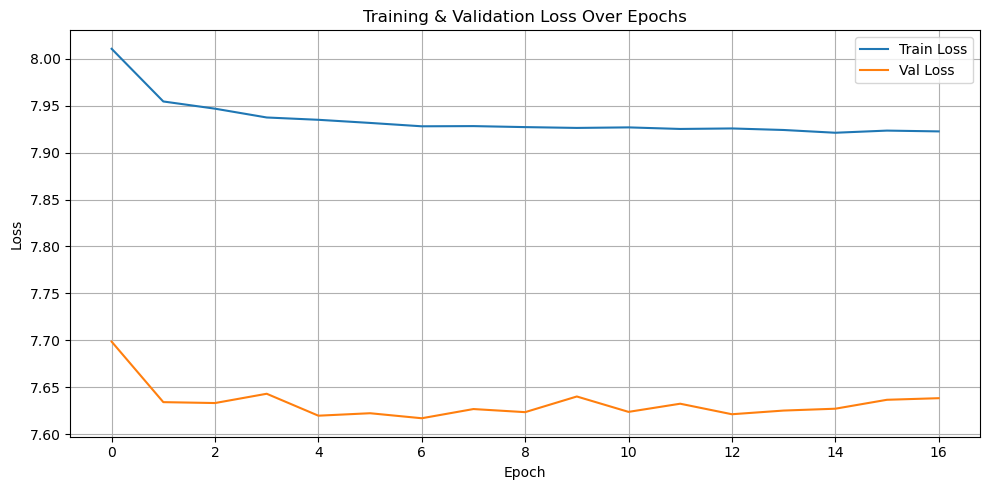

[2025-07-07 08:08:57] [INFO]: Events: 262200
[2025-07-07 08:08:57] [INFO]: Cases: 13087
[2025-07-07 08:08:57] [INFO]: Activities: 24
[2025-07-07 08:08:57] [INFO]: Resources: 68
[2025-07-07 08:08:57] [INFO]: Start: 2011-10-01 00:38:44.546000, End: 2012-03-14 16:04:54.681000


num_attributes: ['headline_pos', 'headline_neg', 'headline_neu', 'case:AMOUNT_REQ'], learning_rate: 0.0005, n_gram: 1, time_window: 0


[2025-07-07 08:08:57] [INFO]: Events/case avg: 20.04, max: 175, min: 3
[2025-07-07 08:08:57] [INFO]: Missing values: org:resource=18010
[2025-07-07 08:08:58] [INFO]: Cases with disordered timestamps: 0
[2025-07-07 08:08:58] [INFO]: Preparing data...
Processing cases: 100%|██████████| 13087/13087 [02:24<00:00, 90.77it/s] 
[2025-07-07 08:11:23] [DEBUG]: Final feature shape: (249113, 28)
[2025-07-07 08:11:23] [DEBUG]: Final label shape: (249113,)
[2025-07-07 08:11:24] [INFO]: Building regression model with input dimension: 28
[2025-07-07 08:11:24] [INFO]: Hidden units: [256, 128, 64, 32, 16]


Epoch 1/250
5450/5450 [==============================] - 19s 3ms/step - loss: 8.0210 - mae: 8.0210 - val_loss: 7.6737 - val_mae: 7.6737
Epoch 2/250
5450/5450 [==============================] - 18s 3ms/step - loss: 7.9505 - mae: 7.9505 - val_loss: 7.6756 - val_mae: 7.6756
Epoch 3/250
5450/5450 [==============================] - 18s 3ms/step - loss: 7.9372 - mae: 7.9372 - val_loss: 7.6432 - val_mae: 7.6432
Epoch 4/250
5450/5450 [==============================] - 18s 3ms/step - loss: 7.9272 - mae: 7.9272 - val_loss: 7.6392 - val_mae: 7.6392
Epoch 5/250
5450/5450 [==============================] - 18s 3ms/step - loss: 7.9215 - mae: 7.9215 - val_loss: 7.6410 - val_mae: 7.6410
Epoch 6/250
5450/5450 [==============================] - 17s 3ms/step - loss: 7.9146 - mae: 7.9146 - val_loss: 7.6998 - val_mae: 7.6998
Epoch 7/250
5450/5450 [==============================] - 18s 3ms/step - loss: 7.9122 - mae: 7.9122 - val_loss: 7.6499 - val_mae: 7.6499
Epoch 8/250
5450/5450 [=========================

[2025-07-07 08:15:34] [DEBUG]: X_test shape: (49823, 28)
[2025-07-07 08:15:34] [DEBUG]: y_test shape: (49823,)


1557/1557 [==============================] - 2s 1ms/step


[2025-07-07 08:15:36] [DEBUG]: Testing guessing the average:
[2025-07-07 08:15:36] [DEBUG]: MAE (guessing average): 7.2464
[2025-07-07 08:15:36] [DEBUG]: MSE (guessing average): 78.5831
[2025-07-07 08:15:36] [DEBUG]: R² (guessing average): 0.0000
[2025-07-07 08:15:36] [INFO]: [mlp_monitoring_bpi_2012_w0_n1] MAE: 5.8126, MSE: 66.3240, R^2: 0.1560
[2025-07-07 08:15:36] [INFO]: Model mlp_monitoring_bpi_2012_w0_n1 evaluated with accuracy: 5.812642855685938


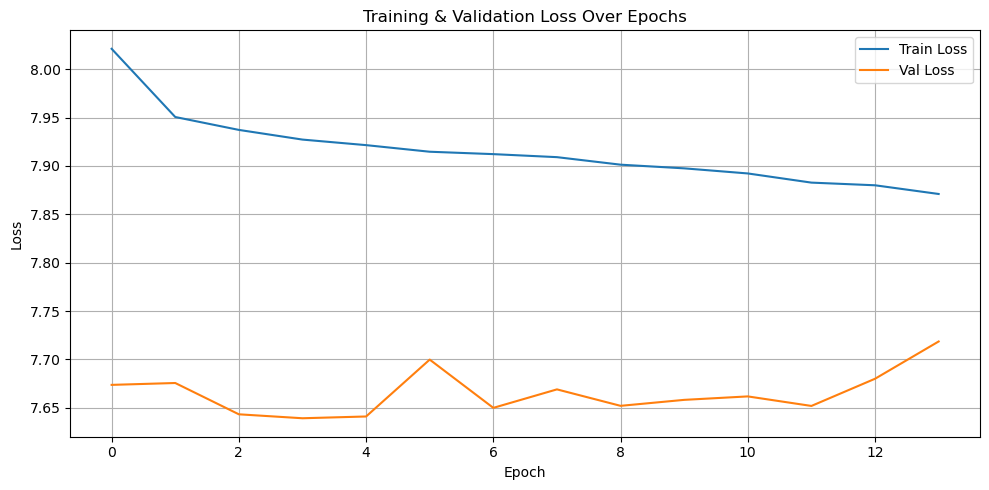

[2025-07-07 08:15:36] [INFO]: Events: 262200
[2025-07-07 08:15:36] [INFO]: Cases: 13087
[2025-07-07 08:15:37] [INFO]: Activities: 24


num_attributes: ['snippet_pos', 'snippet_neg', 'snippet_neu', 'case:AMOUNT_REQ'], learning_rate: 0.0005, n_gram: 1, time_window: 0


[2025-07-07 08:15:37] [INFO]: Resources: 68
[2025-07-07 08:15:37] [INFO]: Start: 2011-10-01 00:38:44.546000, End: 2012-03-14 16:04:54.681000
[2025-07-07 08:15:37] [INFO]: Events/case avg: 20.04, max: 175, min: 3
[2025-07-07 08:15:37] [INFO]: Missing values: org:resource=18010
[2025-07-07 08:15:38] [INFO]: Cases with disordered timestamps: 0
[2025-07-07 08:15:38] [INFO]: Preparing data...
Processing cases: 100%|██████████| 13087/13087 [02:26<00:00, 89.11it/s] 
[2025-07-07 08:18:06] [DEBUG]: Final feature shape: (249113, 28)
[2025-07-07 08:18:06] [DEBUG]: Final label shape: (249113,)
[2025-07-07 08:18:06] [INFO]: Building regression model with input dimension: 28
[2025-07-07 08:18:06] [INFO]: Hidden units: [256, 128, 64, 32, 16]


Epoch 1/250
5450/5450 [==============================] - 19s 3ms/step - loss: 8.0079 - mae: 8.0079 - val_loss: 7.6633 - val_mae: 7.6633
Epoch 2/250
5450/5450 [==============================] - 18s 3ms/step - loss: 7.9449 - mae: 7.9449 - val_loss: 7.6457 - val_mae: 7.6457
Epoch 3/250
5450/5450 [==============================] - 18s 3ms/step - loss: 7.9320 - mae: 7.9320 - val_loss: 7.6418 - val_mae: 7.6418
Epoch 4/250
5450/5450 [==============================] - 18s 3ms/step - loss: 7.9220 - mae: 7.9220 - val_loss: 7.6407 - val_mae: 7.6407
Epoch 5/250
5450/5450 [==============================] - 18s 3ms/step - loss: 7.9130 - mae: 7.9130 - val_loss: 7.6973 - val_mae: 7.6973
Epoch 6/250
5450/5450 [==============================] - 18s 3ms/step - loss: 7.9080 - mae: 7.9080 - val_loss: 7.6281 - val_mae: 7.6281
Epoch 7/250
5450/5450 [==============================] - 18s 3ms/step - loss: 7.8973 - mae: 7.8973 - val_loss: 7.6410 - val_mae: 7.6410
Epoch 8/250
5450/5450 [=========================

[2025-07-07 08:22:52] [DEBUG]: X_test shape: (49823, 28)
[2025-07-07 08:22:52] [DEBUG]: y_test shape: (49823,)


1557/1557 [==============================] - 2s 1ms/step


[2025-07-07 08:22:54] [DEBUG]: Testing guessing the average:
[2025-07-07 08:22:54] [DEBUG]: MAE (guessing average): 7.2464
[2025-07-07 08:22:54] [DEBUG]: MSE (guessing average): 78.5831
[2025-07-07 08:22:54] [DEBUG]: R² (guessing average): 0.0000
[2025-07-07 08:22:54] [INFO]: [mlp_monitoring_bpi_2012_w0_n1] MAE: 6.1130, MSE: 70.3090, R^2: 0.1053
[2025-07-07 08:22:54] [INFO]: Model mlp_monitoring_bpi_2012_w0_n1 evaluated with accuracy: 6.112966140090167


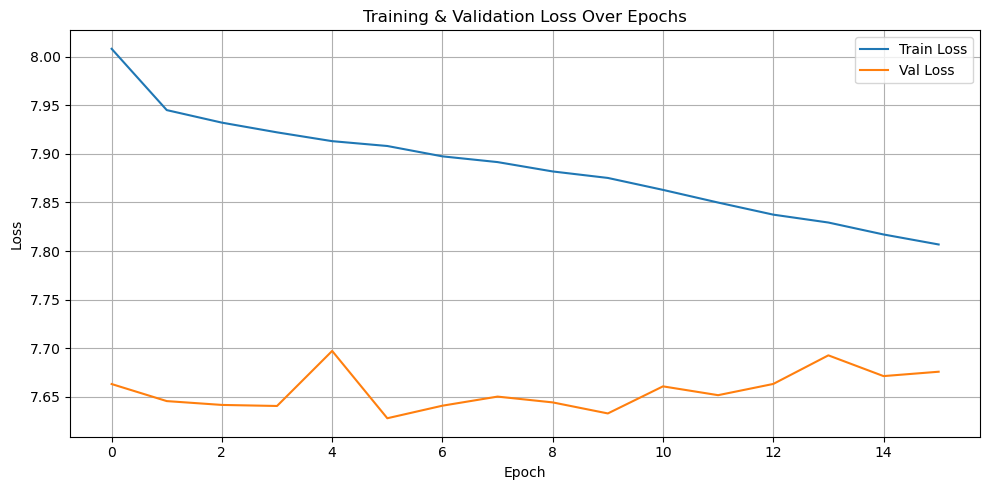

[2025-07-07 08:22:55] [INFO]: Events: 262200
[2025-07-07 08:22:55] [INFO]: Cases: 13087
[2025-07-07 08:22:55] [INFO]: Activities: 24
[2025-07-07 08:22:55] [INFO]: Resources: 68
[2025-07-07 08:22:55] [INFO]: Start: 2011-10-01 00:38:44.546000, End: 2012-03-14 16:04:54.681000


num_attributes: ['headline_pos', 'headline_neg', 'headline_neu', 'snippet_pos', 'snippet_neg', 'snippet_neu', 'case:AMOUNT_REQ'], learning_rate: 0.0005, n_gram: 1, time_window: 0


[2025-07-07 08:22:55] [INFO]: Events/case avg: 20.04, max: 175, min: 3
[2025-07-07 08:22:55] [INFO]: Missing values: org:resource=18010
[2025-07-07 08:22:56] [INFO]: Cases with disordered timestamps: 0
[2025-07-07 08:22:56] [INFO]: Preparing data...
Processing cases: 100%|██████████| 13087/13087 [02:24<00:00, 90.39it/s] 
[2025-07-07 08:25:22] [DEBUG]: Final feature shape: (249113, 31)
[2025-07-07 08:25:22] [DEBUG]: Final label shape: (249113,)
[2025-07-07 08:25:22] [INFO]: Building regression model with input dimension: 31
[2025-07-07 08:25:22] [INFO]: Hidden units: [256, 128, 64, 32, 16]


Epoch 1/250
5450/5450 [==============================] - 19s 3ms/step - loss: 8.0067 - mae: 8.0067 - val_loss: 7.6473 - val_mae: 7.6473
Epoch 2/250
5450/5450 [==============================] - 18s 3ms/step - loss: 7.9411 - mae: 7.9411 - val_loss: 7.6748 - val_mae: 7.6748
Epoch 3/250
5450/5450 [==============================] - 18s 3ms/step - loss: 7.9243 - mae: 7.9243 - val_loss: 7.7017 - val_mae: 7.7017
Epoch 4/250
5450/5450 [==============================] - 18s 3ms/step - loss: 7.9084 - mae: 7.9084 - val_loss: 7.6736 - val_mae: 7.6736
Epoch 5/250
5450/5450 [==============================] - 17s 3ms/step - loss: 7.8872 - mae: 7.8872 - val_loss: 7.6734 - val_mae: 7.6734
Epoch 6/250
5450/5450 [==============================] - 17s 3ms/step - loss: 7.8728 - mae: 7.8728 - val_loss: 7.6724 - val_mae: 7.6724
Epoch 7/250
5450/5450 [==============================] - 18s 3ms/step - loss: 7.8618 - mae: 7.8618 - val_loss: 7.6855 - val_mae: 7.6855
Epoch 8/250
5450/5450 [=========================

[2025-07-07 08:28:38] [DEBUG]: X_test shape: (49823, 31)
[2025-07-07 08:28:38] [DEBUG]: y_test shape: (49823,)


1557/1557 [==============================] - 2s 1ms/step


[2025-07-07 08:28:40] [DEBUG]: Testing guessing the average:
[2025-07-07 08:28:40] [DEBUG]: MAE (guessing average): 7.2464
[2025-07-07 08:28:40] [DEBUG]: MSE (guessing average): 78.5831
[2025-07-07 08:28:40] [DEBUG]: R² (guessing average): 0.0000
[2025-07-07 08:28:40] [INFO]: [mlp_monitoring_bpi_2012_w0_n1] MAE: 5.9505, MSE: 68.5016, R^2: 0.1283
[2025-07-07 08:28:40] [INFO]: Model mlp_monitoring_bpi_2012_w0_n1 evaluated with accuracy: 5.950532308205059


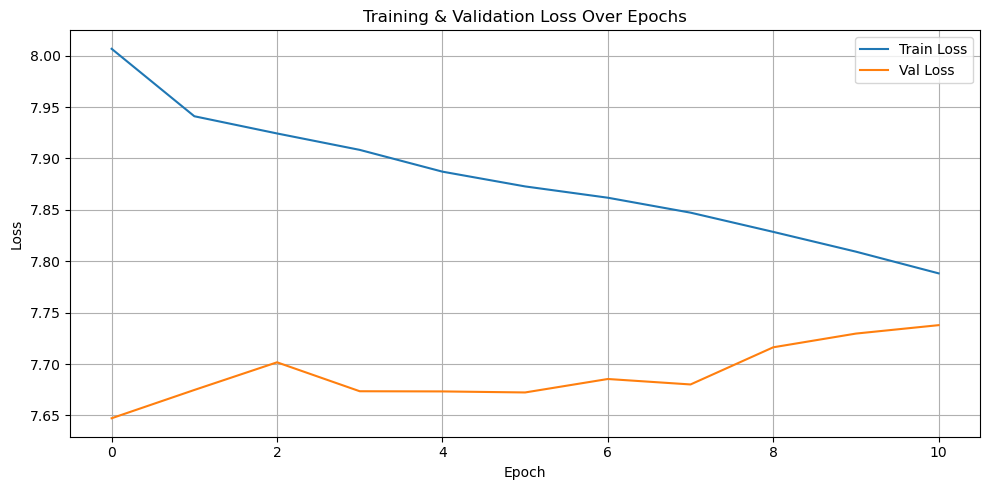

[2025-07-07 08:28:40] [INFO]: Events: 262200
[2025-07-07 08:28:40] [INFO]: Cases: 13087
[2025-07-07 08:28:40] [INFO]: Activities: 24
[2025-07-07 08:28:40] [INFO]: Resources: 68
[2025-07-07 08:28:40] [INFO]: Start: 2011-10-01 00:38:44.546000, End: 2012-03-14 16:04:54.681000
[2025-07-07 08:28:40] [INFO]: Events/case avg: 20.04, max: 175, min: 3


num_attributes: ['case:AMOUNT_REQ'], learning_rate: 0.0005, n_gram: 1, time_window: 0


[2025-07-07 08:28:41] [INFO]: Missing values: org:resource=18010
[2025-07-07 08:28:42] [INFO]: Cases with disordered timestamps: 0
[2025-07-07 08:28:42] [INFO]: Preparing data...
Processing cases: 100%|██████████| 13087/13087 [02:23<00:00, 91.18it/s] 
[2025-07-07 08:31:06] [DEBUG]: Final feature shape: (249113, 25)
[2025-07-07 08:31:06] [DEBUG]: Final label shape: (249113,)


[0]	train-mae:9.77206	val-mae:9.29698
[1]	train-mae:9.46312	val-mae:8.98744
[2]	train-mae:9.23808	val-mae:8.78792
[3]	train-mae:9.07727	val-mae:8.63634
[4]	train-mae:8.94141	val-mae:8.51391
[5]	train-mae:8.83385	val-mae:8.42891
[6]	train-mae:8.78542	val-mae:8.38323
[7]	train-mae:8.71897	val-mae:8.33025
[8]	train-mae:8.66904	val-mae:8.28836
[9]	train-mae:8.63414	val-mae:8.25837
[10]	train-mae:8.59870	val-mae:8.22630
[11]	train-mae:8.55751	val-mae:8.19432
[12]	train-mae:8.52625	val-mae:8.16069
[13]	train-mae:8.51464	val-mae:8.15245
[14]	train-mae:8.49120	val-mae:8.13151
[15]	train-mae:8.47047	val-mae:8.11208
[16]	train-mae:8.46149	val-mae:8.10546
[17]	train-mae:8.44063	val-mae:8.08917
[18]	train-mae:8.42549	val-mae:8.07642
[19]	train-mae:8.41771	val-mae:8.07181
[20]	train-mae:8.40568	val-mae:8.06227
[21]	train-mae:8.39621	val-mae:8.05730
[22]	train-mae:8.38993	val-mae:8.05456
[23]	train-mae:8.38210	val-mae:8.05060
[24]	train-mae:8.37770	val-mae:8.05137
[25]	train-mae:8.37178	val-mae:8.04

[2025-07-07 08:31:07] [INFO]: [xgboost_monitoring_bpi_2012_w0_n1] MAE: 6.9586, MSE: 75.2355, R^2: 0.0426
[2025-07-07 08:31:07] [INFO]: Model xgboost_monitoring_bpi_2012_w0_n1 evaluated with accuracy: 6.958647951669636
[2025-07-07 08:31:07] [INFO]: Events: 262200


XGBoost does not store training history for plotting directly.
num_attributes: ['headline_pos', 'headline_neg', 'headline_neu', 'case:AMOUNT_REQ'], learning_rate: 0.0005, n_gram: 1, time_window: 0


[2025-07-07 08:31:07] [INFO]: Cases: 13087
[2025-07-07 08:31:07] [INFO]: Activities: 24
[2025-07-07 08:31:07] [INFO]: Resources: 68
[2025-07-07 08:31:07] [INFO]: Start: 2011-10-01 00:38:44.546000, End: 2012-03-14 16:04:54.681000
[2025-07-07 08:31:07] [INFO]: Events/case avg: 20.04, max: 175, min: 3
[2025-07-07 08:31:07] [INFO]: Missing values: org:resource=18010
[2025-07-07 08:31:09] [INFO]: Cases with disordered timestamps: 0
[2025-07-07 08:31:09] [INFO]: Preparing data...
Processing cases: 100%|██████████| 13087/13087 [02:23<00:00, 91.35it/s] 
[2025-07-07 08:33:33] [DEBUG]: Final feature shape: (249113, 28)
[2025-07-07 08:33:33] [DEBUG]: Final label shape: (249113,)


[0]	train-mae:9.75133	val-mae:9.31335
[1]	train-mae:9.41620	val-mae:9.00966
[2]	train-mae:9.16664	val-mae:8.80316
[3]	train-mae:9.00012	val-mae:8.64770
[4]	train-mae:8.85547	val-mae:8.52473
[5]	train-mae:8.73220	val-mae:8.42506
[6]	train-mae:8.67037	val-mae:8.36713
[7]	train-mae:8.60764	val-mae:8.32076
[8]	train-mae:8.51376	val-mae:8.31163
[9]	train-mae:8.46054	val-mae:8.26176
[10]	train-mae:8.43725	val-mae:8.24589
[11]	train-mae:8.37593	val-mae:8.19989
[12]	train-mae:8.34371	val-mae:8.18723
[13]	train-mae:8.30271	val-mae:8.19763
[14]	train-mae:8.28976	val-mae:8.18877
[15]	train-mae:8.24975	val-mae:8.18502
[16]	train-mae:8.22221	val-mae:8.16183
[17]	train-mae:8.20975	val-mae:8.15801
[18]	train-mae:8.14642	val-mae:8.15603
[19]	train-mae:8.11506	val-mae:8.15134
[20]	train-mae:8.06799	val-mae:8.14705
[21]	train-mae:8.04373	val-mae:8.13226
[22]	train-mae:8.02890	val-mae:8.12766
[23]	train-mae:7.99652	val-mae:8.14297
[24]	train-mae:7.96355	val-mae:8.14602
[25]	train-mae:7.95317	val-mae:8.13

[2025-07-07 08:33:34] [INFO]: [xgboost_monitoring_bpi_2012_w0_n1] MAE: 6.7935, MSE: 72.6534, R^2: 0.0755
[2025-07-07 08:33:34] [INFO]: Model xgboost_monitoring_bpi_2012_w0_n1 evaluated with accuracy: 6.7934844447712965
[2025-07-07 08:33:34] [INFO]: Events: 262200
[2025-07-07 08:33:34] [INFO]: Cases: 13087


XGBoost does not store training history for plotting directly.
num_attributes: ['snippet_pos', 'snippet_neg', 'snippet_neu', 'case:AMOUNT_REQ'], learning_rate: 0.0005, n_gram: 1, time_window: 0


[2025-07-07 08:33:34] [INFO]: Activities: 24
[2025-07-07 08:33:34] [INFO]: Resources: 68
[2025-07-07 08:33:34] [INFO]: Start: 2011-10-01 00:38:44.546000, End: 2012-03-14 16:04:54.681000
[2025-07-07 08:33:34] [INFO]: Events/case avg: 20.04, max: 175, min: 3
[2025-07-07 08:33:34] [INFO]: Missing values: org:resource=18010
[2025-07-07 08:33:35] [INFO]: Cases with disordered timestamps: 0
[2025-07-07 08:33:35] [INFO]: Preparing data...
Processing cases: 100%|██████████| 13087/13087 [02:25<00:00, 89.88it/s] 
[2025-07-07 08:36:02] [DEBUG]: Final feature shape: (249113, 28)
[2025-07-07 08:36:02] [DEBUG]: Final label shape: (249113,)


[0]	train-mae:9.74559	val-mae:9.29291
[1]	train-mae:9.40350	val-mae:8.98028
[2]	train-mae:9.15527	val-mae:8.78465
[3]	train-mae:8.98645	val-mae:8.62822
[4]	train-mae:8.83856	val-mae:8.49978
[5]	train-mae:8.71113	val-mae:8.39859
[6]	train-mae:8.64910	val-mae:8.34055
[7]	train-mae:8.58608	val-mae:8.29215
[8]	train-mae:8.49087	val-mae:8.27129
[9]	train-mae:8.44259	val-mae:8.22502
[10]	train-mae:8.40998	val-mae:8.20013
[11]	train-mae:8.36101	val-mae:8.16413
[12]	train-mae:8.27618	val-mae:8.13929
[13]	train-mae:8.24777	val-mae:8.11046
[14]	train-mae:8.23500	val-mae:8.10243
[15]	train-mae:8.21004	val-mae:8.09395
[16]	train-mae:8.15022	val-mae:8.10222
[17]	train-mae:8.10388	val-mae:8.08842
[18]	train-mae:8.08751	val-mae:8.07672
[19]	train-mae:8.07038	val-mae:8.08042
[20]	train-mae:8.05689	val-mae:8.08325
[21]	train-mae:8.04921	val-mae:8.08092
[22]	train-mae:7.99961	val-mae:8.08110
[23]	train-mae:7.98646	val-mae:8.06839
[24]	train-mae:7.97233	val-mae:8.07224
[25]	train-mae:7.92602	val-mae:8.06

[2025-07-07 08:36:03] [INFO]: [xgboost_monitoring_bpi_2012_w0_n1] MAE: 7.0605, MSE: 81.9182, R^2: -0.0424
[2025-07-07 08:36:03] [INFO]: Model xgboost_monitoring_bpi_2012_w0_n1 evaluated with accuracy: 7.0605482066391865
[2025-07-07 08:36:03] [INFO]: Events: 262200
[2025-07-07 08:36:03] [INFO]: Cases: 13087


XGBoost does not store training history for plotting directly.
num_attributes: ['headline_pos', 'headline_neg', 'headline_neu', 'snippet_pos', 'snippet_neg', 'snippet_neu', 'case:AMOUNT_REQ'], learning_rate: 0.0005, n_gram: 1, time_window: 0


[2025-07-07 08:36:03] [INFO]: Activities: 24
[2025-07-07 08:36:03] [INFO]: Resources: 68
[2025-07-07 08:36:03] [INFO]: Start: 2011-10-01 00:38:44.546000, End: 2012-03-14 16:04:54.681000
[2025-07-07 08:36:03] [INFO]: Events/case avg: 20.04, max: 175, min: 3
[2025-07-07 08:36:03] [INFO]: Missing values: org:resource=18010
[2025-07-07 08:36:04] [INFO]: Cases with disordered timestamps: 0
[2025-07-07 08:36:04] [INFO]: Preparing data...
Processing cases: 100%|██████████| 13087/13087 [02:25<00:00, 90.22it/s] 
[2025-07-07 08:38:30] [DEBUG]: Final feature shape: (249113, 31)
[2025-07-07 08:38:30] [DEBUG]: Final label shape: (249113,)


[0]	train-mae:9.74323	val-mae:9.29540
[1]	train-mae:9.39912	val-mae:8.98249
[2]	train-mae:9.14632	val-mae:8.79488
[3]	train-mae:8.97768	val-mae:8.63929
[4]	train-mae:8.82998	val-mae:8.51367
[5]	train-mae:8.69989	val-mae:8.42049
[6]	train-mae:8.63792	val-mae:8.36252
[7]	train-mae:8.57281	val-mae:8.31283
[8]	train-mae:8.46691	val-mae:8.32633
[9]	train-mae:8.41334	val-mae:8.27807
[10]	train-mae:8.39013	val-mae:8.26231
[11]	train-mae:8.33967	val-mae:8.22949
[12]	train-mae:8.26468	val-mae:8.21998
[13]	train-mae:8.22500	val-mae:8.19878
[14]	train-mae:8.19778	val-mae:8.18630
[15]	train-mae:8.12598	val-mae:8.23368
[16]	train-mae:8.10467	val-mae:8.21974
[17]	train-mae:8.08651	val-mae:8.19870
[18]	train-mae:8.05465	val-mae:8.21406
[19]	train-mae:8.00783	val-mae:8.18444
[20]	train-mae:7.97673	val-mae:8.18144
[21]	train-mae:7.94019	val-mae:8.16331
[22]	train-mae:7.91820	val-mae:8.17430
[23]	train-mae:7.89074	val-mae:8.17574
[24]	train-mae:7.86687	val-mae:8.15849
[25]	train-mae:7.86118	val-mae:8.15

[2025-07-07 08:38:31] [INFO]: [xgboost_monitoring_bpi_2012_w0_n1] MAE: 6.9583, MSE: 78.7413, R^2: -0.0020
[2025-07-07 08:38:31] [INFO]: Model xgboost_monitoring_bpi_2012_w0_n1 evaluated with accuracy: 6.9583181382816015


XGBoost does not store training history for plotting directly.


In [ ]:
update_repository()
from itertools import combinations
from evaluate import evaluate_monitoring
from plotting import plot_time_window_comparison_over_prefix_length

log_file = enriched_log_file

# set hyperparameters
architectures = ["mlp", "xgboost"]
architectures = ["mlp"]
hidden_units=[1024, 512, 256, 128, 64, 32, 16]
hidden_units=[2048, 1024, 512, 256, 128, 64, 32, 16]
hidden_units=[4096, 2048, 1024, 512, 256, 128, 64, 32, 16]
hidden_units=[256, 128, 64, 32, 16]
learning_rate = 0.0005
conv_kernel_size = [7, 5]
conv_filters = [64, 128]
patience = 5
cat_attributes = []
num_attributes = []
max_recent_articles = None
max_recent_articles = 1
umap_components = 3
time_window = 0
n_gram = 1
target = "remaining_time_state"

# set parameters bpi_2012
if base_folder_name == "bpi_2012":
    text_columns = ["headline", "snippet"]
    sentiment_degrees = ["pos", "neg", "neu"]
    text_column_combinations = [
        list(combo)
        for r in range(len(text_columns) + 1)
        for combo in combinations(text_columns, r)
    ]
    all_sentiment_columns = [
        [f"{text}_{sentiment}" for text in combo for sentiment in sentiment_degrees] + ["case:AMOUNT_REQ"]
        for combo in text_column_combinations
    ]

# build paths
log_dir = os.path.join("data", "raw_logs")
text_df = pd.read_csv(text_output_path)
text_df = convert_to_datetime(text_df, "pub_date")

# build event_df
log_df = pm4py.read_xes(os.path.join(log_dir, log_file))
log_df = convert_to_datetime(log_df, "time:timestamp")

#TODO
all_sentiment_columns = [['headline_pos', 'headline_neg', 'headline_neu', 'case:AMOUNT_REQ']]

# evaluation
results = []
for architecture in architectures:
    for num_attributes in all_sentiment_columns:
        print(f"num_attributes: {num_attributes}, learning_rate: {learning_rate}, n_gram: {n_gram}, time_window: {time_window}")
        accuracy = evaluate_monitoring(
            folder_name=folder_name,
            text_df=text_df,
            log_df=log_df,
            architecture=architecture,
            target=target,
            n_gram=n_gram,
            time_window=time_window,
            cat_attributes=cat_attributes,
            num_attributes=num_attributes,
            hidden_units=hidden_units,
            conv_kernel_sizes=conv_kernel_size,
            conv_filters=conv_filters,
            learning_rate=learning_rate,
            patience=patience,
            umap_components=umap_components,
            max_recent_articles=max_recent_articles,
        )

# Stock Price Prediction

### Initialisation

In [ ]:
update_repository()
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sentence_transformers import SentenceTransformer

from pathlib import Path

stock = "TSLA"

# --- Paths (OS-independent) ---
data_dir = Path("data/stocks")
sub_data_dir = Path(f"data/stocks/{stock}")
postfix = f"_{stock.lower()}"

news_path = data_dir / "sentiment.csv"
stocks_path = data_dir / "stocks_data.csv"
output_path = data_dir / "processed_df.pkl"

date_column = "date"
close_column = "close"

headlines_path = data_dir / f"headlines{postfix}.csv"
news_path = data_dir / f"news{postfix}.csv"
stocks_path = data_dir / f"stocks{postfix}.csv"
output_path = data_dir / f"processed_df{postfix}.pkl"
results_dir = data_dir / f"results"
os.makedirs(results_dir, exist_ok=True)


Updating the git repository...
Already up to date.



### Build News CSV

In [18]:
update_repository()
from stock_processing import build_news_csv

idx_df = pd.read_csv(headlines_path)
news_df = build_news_csv(idx_df, sub_data_dir, 
                         date_column=date_column,)
news_df.to_csv(news_path, index=False)

Updating the git repository...


[2025-07-15 09:35:01] [DEBUG]: More than 10 titles found for 2021-04-21 00:00:00, truncating to 10.
[2025-07-15 09:35:01] [DEBUG]: More than 10 titles found for 2021-06-16 00:00:00, truncating to 10.
[2025-07-15 09:35:01] [DEBUG]: More than 10 titles found for 2021-06-17 00:00:00, truncating to 10.


Already up to date.



[2025-07-15 09:35:01] [DEBUG]: More than 10 titles found for 2021-07-21 00:00:00, truncating to 10.
[2025-07-15 09:35:01] [DEBUG]: More than 10 titles found for 2021-07-22 00:00:00, truncating to 10.
[2025-07-15 09:35:01] [DEBUG]: More than 10 titles found for 2021-07-23 00:00:00, truncating to 10.
[2025-07-15 09:35:01] [DEBUG]: More than 10 titles found for 2021-10-20 00:00:00, truncating to 10.
[2025-07-15 09:35:01] [DEBUG]: More than 10 titles found for 2021-10-21 00:00:00, truncating to 10.
[2025-07-15 09:35:01] [DEBUG]: More than 10 titles found for 2021-10-22 00:00:00, truncating to 10.
[2025-07-15 09:35:01] [DEBUG]: More than 10 titles found for 2022-01-26 00:00:00, truncating to 10.
[2025-07-15 09:35:01] [DEBUG]: More than 10 titles found for 2022-04-20 00:00:00, truncating to 10.
[2025-07-15 09:35:01] [DEBUG]: More than 10 titles found for 2022-07-20 00:00:00, truncating to 10.
[2025-07-15 09:35:01] [DEBUG]: Created news DataFrame with 427 rows and 11 columns.
[2025-07-15 09:3

### Add FinBERT

In [19]:
from transformers import pipeline
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm  # optional progress bar

# 1️⃣  Load FinBERT once (first call downloads weights)
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="ProsusAI/finbert",
    tokenizer="ProsusAI/finbert",
    truncation=True,
    device=0  # set to -1 for CPU
)

label_to_score = {"positive": 1.0, "negative": -1.0, "neutral": 0.0}

def compute_finbert_scores(df, news_prefix="News"):
    news_cols = [c for c in df.columns if c.startswith(news_prefix)]
    finbert_scores = []

    for _, row in tqdm(df.iterrows(), total=len(df), desc="FinBERT rows"):
        # grab non‑zero headlines
        texts = [str(row[c]).strip() for c in news_cols if str(row[c]).strip() != "0"]
        if not texts:
            finbert_scores.append(0.0)
            continue

        batch_out = sentiment_pipeline(texts, batch_size=8)
        vals = [label_to_score[o["label"].lower()] * o["score"] for o in batch_out]
        finbert_scores.append(float(np.mean(vals)))

    df["FinBERT score"] = finbert_scores
    return df

# 2️⃣  Load, enrich, save
df = pd.read_csv(news_path)
df = compute_finbert_scores(df)
df.to_csv(news_path, index=False)

Device set to use cuda:0


FinBERT rows:   0%|          | 0/427 [00:00<?, ?it/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


### Build Feature DF

In [3]:
update_repository()
from stock_processing import create_merged_stock_df


# --- Load CSVs ---

news_df = pd.read_csv(news_path)
stocks_df = pd.read_csv(stocks_path)

merged_df = create_merged_stock_df(
    news_df,
    stocks_df,
    close_column=close_column,
    date_column=date_column,
)


# --- Save to .pkl file (supports arrays in cells) ---

merged_df.to_pickle(output_path)
merged_df.to_csv(output_path.with_suffix(".csv"), index=False)

Updating the git repository...
Already up to date.



/home/jovyan/reddit-mining/src/stock_processing.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_datetime(df[column], errors="coerce", utc=True)


Batches:   0%|          | 0/36 [00:00<?, ?it/s]

### Plot over time

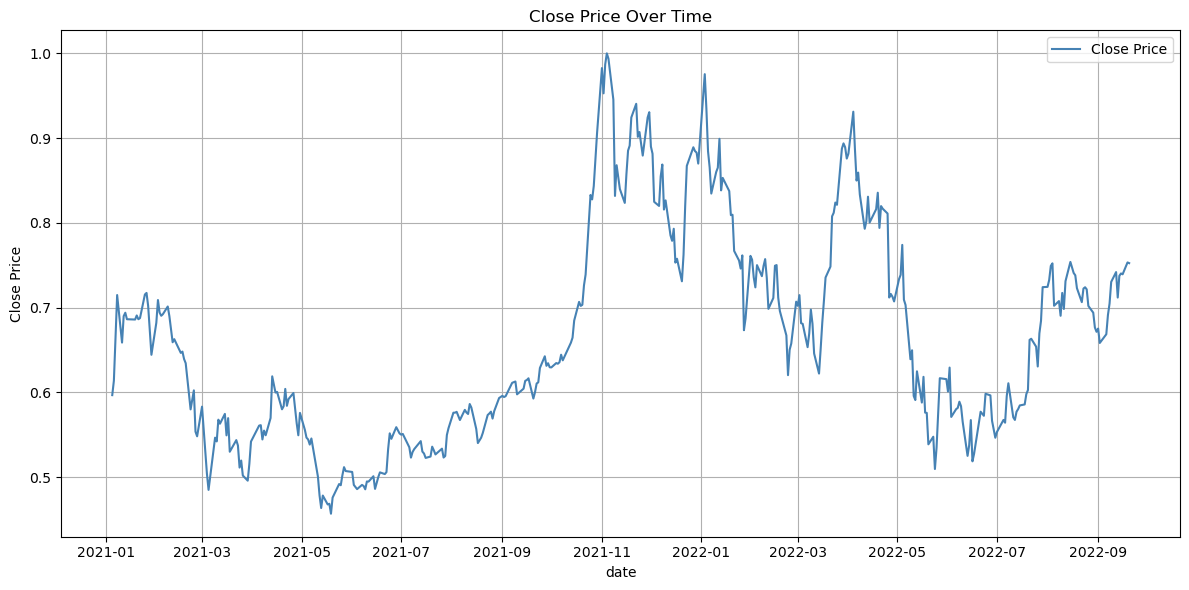

In [ ]:
merged_df = pd.read_pickle(output_path)
merged_df[date_column] = pd.to_datetime(merged_df[date_column])
merged_df = merged_df.sort_values(date_column)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(merged_df[date_column], merged_df[close_column], label="Close Price", color="steelblue")
plt.xlabel(date_column)
plt.ylabel("Close Price")
plt.title("Close Price Over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Evaluate Model

In [ ]:
update_repository()
from stock_processing import run_stocks_experiments
from IPython.display import clear_output

merged_df = pd.read_pickle(output_path)
possible_num_articles = [0, 2, 4, 8, 10]
possible_num_articles = [0]
possible_num_articles = [10]
possible_num_articles = [0, 10]
batch_size = 32
k = 100
patience = 20
train_ratio = 0.75
val_ratio = 0.1
test_ratio = 0.15
hidden_units=[50, 30, 20]
hidden_units=[128, 64, 32, 16]
hidden_units=[1024, 512, 256, 128, 64, 32, 16]
hidden_units_news=[128, 32, 4]
hidden_units_news=[128]
learning_rate = 0.0005
cnn_layers=[(256, 1),(128, 3)]
pooling_layers=[1,2]
use_sentiments = [False]
use_sentiments = [False, True]
modes = ["trend", "regression"]
modes = ["trend"]

for mode in modes:
    for use_sentiment in use_sentiments:
        results_df = run_stocks_experiments(
            merged_df,
            possible_num_articles,
            k=k,
            hidden_units=hidden_units,
            hidden_units_news=hidden_units_news,
            cnn_layers=cnn_layers,
            pooling_layers=pooling_layers,
            learning_rate=learning_rate,
            patience=patience,
            batch_size=batch_size,
            train_ratio=train_ratio,
            val_ratio=val_ratio,
            test_ratio=test_ratio,
            close_column=close_column,
            use_sentiment=use_sentiment,
            mode=mode,
        )
        clear_output(wait=True)

        stocks_df = pd.read_csv(stocks_path)

        # Get min and max from Close column
        close_min = stocks_df[close_column].min()
        close_max = stocks_df[close_column].max()
        scale_range = close_max - close_min

        # Add mae_original to results_df
        results_df["mae_original"] = results_df["mae"] * scale_range

        # Print summary with mae_original
        print(f"\n📊 Summary for {use_sentiment} (mean ± std):")
        summary = (
            results_df.groupby("num_articles")
            .agg(
                mae_mean=("mae", "mean"),
                mae_std=("mae", "std"),
                mae_orig_mean=("mae_original", "mean"),
                mae_orig_std=("mae_original", "std"),
                mse_mean=("mse", "mean"),
                mse_std=("mse", "std"),
                r2_mean=("r2", "mean"),
                r2_std=("r2", "std"),
            )
            .reset_index()
        )

        for _, row in summary.iterrows():
            print(
                f"num_articles = {row['num_articles']}: "
                f"MAE = {row['mae_mean']:.4f} ± {row['mae_std']:.4f} "
                f"(→ {row['mae_orig_mean']:.4f} ± {row['mae_orig_std']:.4f}), "
                f"MSE = {row['mse_mean']:.4f} ± {row['mse_std']:.4f}, "
                f"R2 = {row['r2_mean']:.4f} ± {row['r2_std']:.4f}"
            )
            num_articles = row['num_articles']
            mae = row['mae_mean']
            filename = f"{stock}_{mode}_k_{k}_numarticles_{num_articles}_sent_{use_sentiment}_{mae}.csv"
            filepath = os.path.join(results_dir, filename)
            
            row_df = row.to_frame().T  # Convert Series to DataFrame
            row_df.to_csv(filepath, index=False)


"""
k = 10 times repeated for ATVI regression
📊 Summary for True (mean ± std):
num_articles = 0.0: MAE = 0.0082 ± 0.0011 (→ 0.7695 ± 0.1059), MSE = 0.0001 ± 0.0000, R2 = 0.6400 ± 0.0760
num_articles = 10.0: MAE = 0.0079 ± 0.0009 (→ 0.7345 ± 0.0843), MSE = 0.0001 ± 0.0000, R2 = 0.6572 ± 0.0660

📊 Summary for False (mean ± std):
num_articles = 0.0: MAE = 0.0065 ± 0.0008 (→ 0.6052 ± 0.0742), MSE = 0.0001 ± 0.0000, R2 = 0.7661 ± 0.0464
num_articles = 10.0: MAE = 0.0080 ± 0.0015 (→ 0.7480 ± 0.1376), MSE = 0.0001 ± 0.0000, R2 = 0.6706 ± 0.1010

k = 10 times repeated for ATVI trend
num_articles = 0.0: acc = 0.5538 ± 0.0000 (→ 51.7182 ± 0.0000), f1 = 0.3948 ± 0.0000, R2 = 0.0000 ± 0.0000
num_articles = 10.0: acc = 0.5415 ± 0.0259 (→ 50.5689 ± 2.4229), f1 = 0.4139 ± 0.0403, R2 = 0.0000 ± 0.0000

k = 10 times repeated for tsla trend
num_articles = 0.0: acc = 0.5516 ± 0.0408 (→ 225.5637 ± 16.6853), f1 = 0.3931 ± 0.0453, R2 = 0.0000 ± 0.0000
num_articles = 10.0: acc = 0.5339 ± 0.0490 (→ 218.3087 ± 20.0170), f1 = 0.4610 ± 0.0954, R2 = 0.0000 ± 0.0000
"""


📊 Summary for True (mean ± std):
num_articles = 0.0: MAE = 0.0302 ± 0.0144 (→ 1.9702 ± 0.9414), MSE = 0.0015 ± 0.0013, R2 = 0.6884 ± 0.2660
num_articles = 10.0: MAE = 0.0347 ± 0.0113 (→ 2.2601 ± 0.7349), MSE = 0.0019 ± 0.0011, R2 = 0.6245 ± 0.2188


'\nk = 10 times repeated for ATVI regression\n📊 Summary for True (mean ± std):\nnum_articles = 0.0: MAE = 0.0082 ± 0.0011 (→ 0.7695 ± 0.1059), MSE = 0.0001 ± 0.0000, R2 = 0.6400 ± 0.0760\nnum_articles = 10.0: MAE = 0.0079 ± 0.0009 (→ 0.7345 ± 0.0843), MSE = 0.0001 ± 0.0000, R2 = 0.6572 ± 0.0660\n\n📊 Summary for False (mean ± std):\nnum_articles = 0.0: MAE = 0.0065 ± 0.0008 (→ 0.6052 ± 0.0742), MSE = 0.0001 ± 0.0000, R2 = 0.7661 ± 0.0464\nnum_articles = 10.0: MAE = 0.0080 ± 0.0015 (→ 0.7480 ± 0.1376), MSE = 0.0001 ± 0.0000, R2 = 0.6706 ± 0.1010\n\nk = 10 times repeated for ATVI trend\nnum_articles = 0.0: acc = 0.5538 ± 0.0000 (→ 51.7182 ± 0.0000), f1 = 0.3948 ± 0.0000, R2 = 0.0000 ± 0.0000\nnum_articles = 10.0: acc = 0.5415 ± 0.0259 (→ 50.5689 ± 2.4229), f1 = 0.4139 ± 0.0403, R2 = 0.0000 ± 0.0000\n\nk = 10 times repeated for tsla trend\nnum_articles = 0.0: acc = 0.5516 ± 0.0408 (→ 225.5637 ± 16.6853), f1 = 0.3931 ± 0.0453, R2 = 0.0000 ± 0.0000\nnum_articles = 10.0: acc = 0.5339 ± 0.0490

### Try Replication

In [ ]:
update_repository()
from stock_processing import extract_X_y
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

split = 0.85
epochs = 100
learning_rate = 0.01
#use_sentiment = True
use_sentiment = False
merged_df = pd.read_pickle(output_path)

X, y = extract_X_y(merged_df, num_articles=0, use_sentiment=use_sentiment)
X = X[1]
train_examples = int(len(X) * split)
X_train = X[:train_examples]
y_train = y[:train_examples]
X_test = X[train_examples:]
y_test = y[train_examples:]


model = tf.keras.models.Sequential(
    [
        tf.keras.Input(shape = (X_train.shape[1],)),
        tf.keras.layers.Dense(units = 50, activation = "relu"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(units = 30, activation = "relu"),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(units = 20, activation = "relu"),
        tf.keras.layers.Dropout(0.01),
        tf.keras.layers.Dense(units = 1, activation = "linear")
    ]
)

model = tf.keras.models.Sequential(
    [
        tf.keras.Input(shape = (X_train.shape[1],)),
        tf.keras.layers.Dense(units = 50, activation = "relu"),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(units = 30, activation = "relu"),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(units = 20, activation = "relu"),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(units = 1, activation = "linear")
    ]
)

model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    #loss = tf.keras.losses.MeanAbsoluteError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
)


model.fit(
    X_train, y_train,
    epochs = epochs,
)

close_min = stocks_df["Close"].min()
close_max = stocks_df["Close"].max()
scale_range = close_max - close_min

predictions = model.predict(X_test)
predictions = predictions * scale_range + close_min
y_test = y_test * scale_range + close_min

mae = mean_absolute_error(predictions, y_test)
mape = mean_absolute_percentage_error(predictions, y_test)
acc = 1 - mape

print(f"MAE: {mae}, MAPE: {mape}, Accuracy: {acc}")


Updating the git repository...
Updating b24349f..a43d01b
Fast-forward
 main.ipynb       | 751 ++++++++++++++-----------------------------------------
 src/cnn_model.py |   2 +-
 2 files changed, 188 insertions(+), 565 deletions(-)

Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 0.1810
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0576
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0443
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0391
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0383
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0316
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0247
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0273
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0225
Epoch 10/100
14/14 [============================

KeyboardInterrupt: 

# Transformer Evaluation

In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from datetime import datetime, timedelta
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import matplotlib.pyplot as plt

## Generate Data

In [4]:
# -----------------------------
# Synthetic data utilities (replace these with your real data)
# -----------------------------
def generate_synthetic_case(case_id, n_events=5, start_time=None):
    if start_time is None:
        start_time = datetime.now() - timedelta(days=30)
    events = []
    for i in range(n_events):
        timestamp = start_time + timedelta(days=i * 2 + np.random.rand())
        activity = np.random.choice(["A", "B", "C", "O_ACCEPTED"], p=[0.3,0.3,0.3,0.1])
        events.append({
            "case:concept:name": case_id,
            "time:timestamp": timestamp,
            "concept:name": activity,
        })
    return events

def generate_synthetic_texts(case_ids, threshold=0.5):
    rows = []
    for cid in case_ids:
        n = np.random.randint(1, 5)
        for _ in range(n):
            timestamp = datetime.now() - timedelta(days=np.random.rand()*7)
            y_pred = np.random.rand()
            X = np.random.randn(64).astype(np.float32)  # embedding dimension 64
            rows.append({
                "case:concept:name": cid,
                "timestamp": timestamp,
                "y_pred": y_pred,
                "X": X
            })
    df = pd.DataFrame(rows)
    return df

# Build synthetic data
case_ids = [str(i) for i in range(100)]
events = []
for cid in case_ids:
    events.extend(generate_synthetic_case(cid, n_events=6))
log_df = pd.DataFrame(events)
text_df = generate_synthetic_texts(case_ids)
print("Synthetic log_df head:"
      f"\n{log_df.head(20)}\n")

Synthetic log_df head:
   case:concept:name             time:timestamp concept:name
0                  0 2025-07-05 11:05:01.908832            B
1                  0 2025-07-07 18:14:14.829226            A
2                  0 2025-07-10 01:39:42.280406            B
3                  0 2025-07-11 13:20:59.523041            A
4                  0 2025-07-13 11:13:08.422801            B
5                  0 2025-07-15 14:01:16.094769            B
6                  1 2025-07-05 20:56:44.840114            C
7                  1 2025-07-07 22:30:32.116743            B
8                  1 2025-07-10 06:08:11.207560            A
9                  1 2025-07-11 15:36:29.498351            B
10                 1 2025-07-13 15:27:12.033062            C
11                 1 2025-07-15 14:40:29.146407            B
12                 2 2025-07-06 07:31:51.280731            B
13                 2 2025-07-07 22:07:32.830406            B
14                 2 2025-07-10 01:28:29.336029            A
1

## Process Data

In [5]:
def parse_embedding_column(df, column="X"):
    matrix = np.stack(df[column].values)
    df[f"{column}_parsed"] = list(matrix)
    return df

def get_article_embedding_matrix(timestamp, text_df, time_window, threshold, max_recent_articles):
    mask = (text_df["timestamp"] >= timestamp - time_window) & (text_df["timestamp"] <= timestamp)
    mask = mask & (text_df["y_pred"] >= threshold)
    candidate = text_df[mask].sort_values("timestamp", ascending=False)
    if candidate.empty:
        return np.zeros((max_recent_articles, 64), dtype=np.float32)
    emb = candidate.iloc[0]["X"]  # most recent article only
    mat = np.zeros((max_recent_articles, emb.shape[0]), dtype=np.float32)
    mat[0] = emb
    return mat

# -----------------------------
# Data preparation (adapted baseline)
# -----------------------------
def prepare_data_monitoring_tuple_synth(
    log_df,
    text_df,
    activity_encoder,
    attr_scaler,
    time_window_days=7,
    threshold=0.5,
    max_recent_articles=10,
    activity_col="concept:name",
    timestamp_col="time:timestamp",
    case_id_col="case:concept:name",
    target="remaining_time",
):
    time_window = timedelta(days=time_window_days)
    text_df = text_df[text_df["y_pred"] >= threshold].copy()
    text_df = parse_embedding_column(text_df, column="X")
    grouped = log_df.groupby(case_id_col)

    X_combined_attrs = []
    X_articles = []
    y = []

    for case_id, group in tqdm(grouped, desc="Building inputs"):
        group_sorted = group.sort_values(timestamp_col)
        events = group_sorted.to_dict("records")
        for i in range(len(events) - 1):
            event = events[i]
            next_events = events[i + 1 :]
            if not next_events:
                continue
            timestamp = event[timestamp_col]
            activity = event[activity_col]

            activity_vec = activity_encoder.transform([[activity]])[0]
            attr_vec = attr_scaler.transform(np.array([[float(case_id)]]))[0]
            combined = np.concatenate([activity_vec, attr_vec])

            article_mat = get_article_embedding_matrix(
                timestamp,
                text_df[text_df["case:concept:name"] == case_id],
                timedelta(days=time_window_days),
                threshold,
                max_recent_articles,
            )

            end_time = next_events[-1][timestamp_col]
            remaining_time = (end_time - timestamp).total_seconds() / 86400.0  # in days

            y.append(remaining_time)
            X_combined_attrs.append(combined.astype(np.float32))
            X_articles.append(article_mat.astype(np.float32))

    X_combined_attrs = np.asarray(X_combined_attrs, dtype=np.float32)
    X_articles = np.asarray(X_articles, dtype=np.float32)
    y = np.asarray(y, dtype=np.float32).reshape(-1, 1)
    return (X_combined_attrs, X_articles), y

# -----------------------------
# Dataset
# -----------------------------
class MonitoringDataset(Dataset):
    def __init__(self, X_attr_act, X_articles, y):
        self.X_attr_act = torch.from_numpy(X_attr_act)
        self.X_articles = torch.from_numpy(X_articles)
        self.y = torch.from_numpy(y)

    def __len__(self):
        return self.X_attr_act.shape[0]

    def __getitem__(self, idx):
        return self.X_attr_act[idx], self.X_articles[idx], self.y[idx]

# Encoders
activity_encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
activity_encoder.fit(np.array([["A"], ["B"], ["C"], ["O_ACCEPTED"]]))
attr_scaler = StandardScaler()
attr_scaler.fit(np.array([[float(i)] for i in case_ids]))

# Prepare data
(X_attr_act, X_articles), y = prepare_data_monitoring_tuple_synth(
    log_df, text_df, activity_encoder, attr_scaler
)

dataset = MonitoringDataset(X_attr_act, X_articles, y)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

Building inputs: 100%|██████████| 100/100 [00:00<00:00, 137.17it/s]


Training CNN baseline...
Using device: cuda
Epoch 1/5 loss: 26.7034
Epoch 2/5 loss: 9.6473
Epoch 3/5 loss: 8.8605
Epoch 4/5 loss: 8.5524
Epoch 5/5 loss: 8.4513
Training Transformer variant...
Using device: cuda
Epoch 1/5 loss: 17.1245
Epoch 2/5 loss: 8.6336
Epoch 3/5 loss: 8.8072
Epoch 4/5 loss: 8.7901
Epoch 5/5 loss: 8.7844


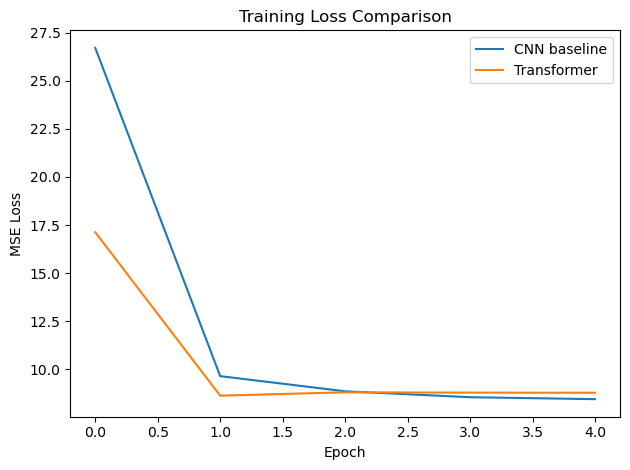

Full-data CNN MSE: 8.4006
Full-data Transformer MSE: 8.4868


In [ ]:
# -----------------------------
# Models
# -----------------------------
class CNNArticleEncoder(nn.Module):
    def __init__(self, embedding_dim=64, max_articles=10, out_dim=128):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels=embedding_dim, out_channels=64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.pool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(128, out_dim)
        self.act = nn.GELU()

    def forward(self, x):
        x = x.transpose(1, 2)  # (batch, embedding_dim, num_articles)
        x = self.act(self.conv1(x))
        x = self.act(self.conv2(x))
        x = self.pool(x).squeeze(-1)
        return self.fc(x)

class FeatureTransformerBlock(nn.Module):
    def __init__(self, d_model, n_heads, dim_feedforward, dropout=0.1):
        super().__init__()
        self.self_attn = nn.MultiheadAttention(embed_dim=d_model, num_heads=n_heads, dropout=dropout, batch_first=True)
        self.norm1 = nn.LayerNorm(d_model)
        self.ff = nn.Sequential(
            nn.Linear(d_model, dim_feedforward),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(dim_feedforward, d_model),
        )
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        attn_out, _ = self.self_attn(x, x, x, need_weights=False)
        x = self.norm1(x + self.dropout(attn_out))
        ff_out = self.ff(x)
        x = self.norm2(x + self.dropout(ff_out))
        return x

class ArticleFeatureTransformer(nn.Module):
    def __init__(self, embedding_dim=64, d_model=128, n_heads=4, num_layers=2, dim_feedforward=256, dropout=0.1):
        super().__init__()
        self.proj = nn.Linear(1, d_model)
        self.pos_embed = nn.Parameter(torch.randn(1, embedding_dim, d_model))
        self.layers = nn.ModuleList([
            FeatureTransformerBlock(d_model, n_heads, dim_feedforward, dropout)
            for _ in range(num_layers)
        ])
        self.pool = lambda x: x.mean(dim=1)
        self.out_proj = nn.Linear(d_model, 128)

    def forward(self, x):
        # x: (batch, num_articles, embedding_dim); take most recent article at index 0
        x = x[:, 0, :]  # (batch, embedding_dim)
        b, emb = x.shape
        x = x.unsqueeze(-1)  # (batch, embedding_dim, 1)
        x = self.proj(x)     # (batch, embedding_dim, d_model)
        x = x + self.pos_embed
        for layer in self.layers:
            x = layer(x)
        pooled = self.pool(x)
        return self.out_proj(pooled)

class CombinedModel(nn.Module):
    def __init__(self, attr_act_dim, use_transformer=True, transformer_cfg=None):
        super().__init__()
        self.attr_proj = nn.Sequential(
            nn.Linear(attr_act_dim, 128),
            nn.GELU(),
            nn.LayerNorm(128),
        )
        if use_transformer:
            self.article_encoder = ArticleFeatureTransformer(**(transformer_cfg or {}))
        else:
            self.article_encoder = CNNArticleEncoder()
        self.head = nn.Sequential(
            nn.Linear(128 + 128, 128),
            nn.GELU(),
            nn.Dropout(0.1),
            nn.Linear(128, 1),
        )

    def forward(self, attr_act_vec, article_mat):
        a = self.attr_proj(attr_act_vec)
        art = self.article_encoder(article_mat)
        combined = torch.cat([a, art], dim=-1)
        return self.head(combined)

# -----------------------------
# Training utilities
# -----------------------------
def train_model(model, dataloader, epochs=5, lr=1e-3):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    model = model.to(device)
    opt = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
    loss_fn = nn.MSELoss()
    history = {"loss": []}
    for ep in range(epochs):
        model.train()
        running = 0.0
        for batch in dataloader:
            attr_act, articles, y = [b.to(device) for b in batch]
            output = model(attr_act, articles)
            loss = loss_fn(output, y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            running += loss.item() * attr_act.size(0)
        epoch_loss = running / len(dataloader.dataset)
        history["loss"].append(epoch_loss)
        print(f"Epoch {ep+1}/{epochs} loss: {epoch_loss:.4f}")
    return model, history

# -----------------------------
# Main execution (example)
# -----------------------------


attr_act_dim = X_attr_act.shape[1]
transformer_cfg = {
    "embedding_dim": 64,
    "d_model": 128,
    "n_heads": 4,
    "num_layers": 2,
    "dim_feedforward": 256,
    "dropout": 0.1,
}

# Baseline: CNN + attribute/activity
model_trans = CombinedModel(attr_act_dim, use_transformer=True, transformer_cfg=transformer_cfg)

print("Training Transformer variant...")
model_trans, hist_trans = train_model(model_trans, loader, epochs=5)

# Loss plot
plt.figure()
plt.plot(hist_trans["loss"], label="Transformer")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Comparison")
plt.legend()
plt.tight_layout()
plt.show()

# Simple evaluation on training data (for demo)
model_trans.eval()
# Helper to run inference and return numpy predictions
def predict_full(model, attr_act_np, article_np):
    device = next(model.parameters()).device  # model's device
    with torch.no_grad():
        attr_act_tensor = torch.from_numpy(attr_act_np).to(device)
        article_tensor = torch.from_numpy(article_np).to(device)
        out = model(attr_act_tensor, article_tensor)  # (N,1)
        out = out.squeeze(-1).cpu().numpy()  # move to CPU and to 1D
    return out

# Get predictions
pred_trans = predict_full(model_trans, X_attr_act, X_articles)
true = y.ravel()

from sklearn.metrics import mean_squared_error
mse_trans_full = mean_squared_error(true, pred_trans)

print(f"Full-data Transformer MSE: {mse_trans_full:.4f}")
